In [1]:
# import all the libs
import numpy as np
import netCDF4 as nc
import os
import time
import numpy as np
import random
import sys
import netCDF4 as ncdf

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib import cm

DATA_PATH = os.path.expanduser("~/Projects/PaperWriting/replaybuffer/plot_data/")
print(DATA_PATH)
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
font = {'weight':'normal','size':7.75}

/Users/jianda/Projects/PaperWriting/replaybuffer/plot_data/


In [2]:
our_colors = {
    1117:"red", 
    # 1:"pink",
    1:"cyan",
    1215:"grey"
}

In [3]:
baseline_3059 = [0.71839768, 0.78166986, 0.75035101, 0.55857122, 0.31072223,
0.13553381, 0.10975218, 0.03127724, 0.11875534, 0.19438004,
0.30579358, 0.39874756, 0.44144642, 0.41907227, 0.52364838,
0.66237491, 0.72084618, 0.72021323, 0.70449448, 0.6528796 ,
0.6253432 , 0.62373805, 0.62900579, 0.61549735, 0.66924798,
0.73753303, 0.80932438, 0.86558288, 0.89789534, 0.98294449]

baseline_029 = np.array([       -np.inf,        -np.inf,        -np.inf,  -np.inf, -0.03682601,
 -0.0198617 ,  0.00432128, -0.18979704,  0.10596609,  0.41487581,
  0.50518453,  0.61953008,  0.64893377,  0.79169357,  0.84712249,
  0.85373306,  0.80380189,  0.7101118 ,  0.59106815,  0.50449407,
  0.49084687,  0.50104964,  0.48927772,  0.43229657,  0.42159998,
  0.41455996,  0.42905229,  0.46457523,  0.49249911,  0.9581309 ])
baseline_029[baseline_029<0] = 0
import json
plot_data_path = "/Users/jianda/Projects/PaperWriting/replaybuffer/plot_data/"
with open(plot_data_path + "offline_r2/replay_buffer_2step_v2_seed1_full.json") as f:
    our1 = json.load(f)
with open(plot_data_path + "offline_r2/replay_buffer_2step_v2_seed1117.json") as f:
    our1117 = json.load(f)
with open(plot_data_path + "offline_r2/replay_buffer_2step_v2_seed1215_full.json") as f:
    our1215 = json.load(f)
with open(plot_data_path + "offline_r2/noreplay_buffer_2step_v2_seed1117_full_noprevQT.json") as f:
    our1117_norp = json.load(f)

In [4]:
our1117_norp["curr"]["0_29"]

{'total': {'var': 0.9870331287384033,
  'std': 0.9934954047203064,
  'mse': 0.1011504977941513,
  'rmse': 0.3180416604694286,
  'mae': 0.09187376499176025,
  'max_ae': 26.227436065673828,
  'bias': 7.241205457830802e-05,
  'r2': 0.8975206688046455,
  'me': 7.241205457830802e-05},
 'level': {'var': [1.3927887039244524e-06,
   1.3927887039244524e-06,
   1.3927887039244524e-06,
   1.3927887039244524e-06,
   1.3928288353781682e-06,
   1.3936306686446187e-06,
   1.3953064126326353e-06,
   1.4021891274751397e-06,
   1.439203856534732e-06,
   1.632064481782436e-06,
   4.476995854929555e-06,
   3.1833405955694616e-05,
   0.00024377834051847458,
   0.0016295663081109524,
   0.00794660858809948,
   0.024535849690437317,
   0.05008431151509285,
   0.07574272155761719,
   0.09782247990369797,
   0.16084808111190796,
   0.27854615449905396,
   0.4330718517303467,
   0.6087549924850464,
   0.8534796833992004,
   0.8190069198608398,
   0.7697308659553528,
   0.7171454429626465,
   0.6353026032447815,

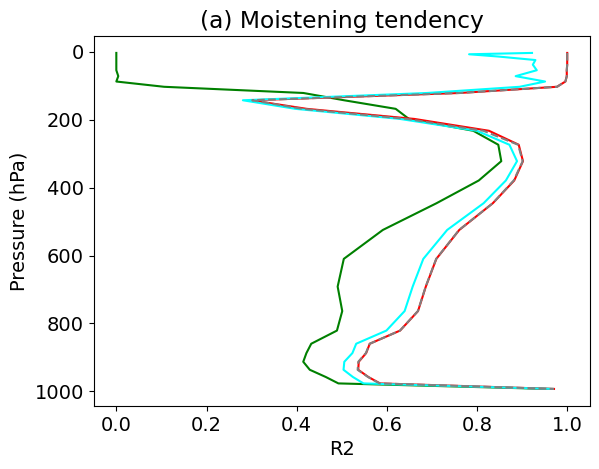

In [5]:
lev = np.array([  3.64346569,   7.59481965,  14.35663225,  24.61222   ,
                    38.26829977,  54.59547974,  72.01245055,  87.82123029,
                   103.31712663, 121.54724076, 142.99403876, 168.22507977,
                   197.9080867 , 232.82861896, 273.91081676, 322.24190235,
                   379.10090387, 445.9925741 , 524.68717471, 609.77869481,
                   691.38943031, 763.40448111, 820.85836865, 859.53476653,
                   887.02024892, 912.64454694, 936.19839847, 957.48547954,
                   976.32540739, 992.55609512])
plt.rcParams.update({'font.size': 14})

plt.title("(a) Moistening tendency")
plt.plot(baseline_029, lev, color="green", label="Wang2022")
#plt.plot(our1["curr"]["0_29"]["level"]["r2"], lev, color="red", marker="o", label="Ours(Seed1)")
plt.plot(our1["curr"]["0_29"]["level"]["r2"], lev, color=our_colors[1117], label="Ours(Seed1117)")
# plt.plot(our1["curr_2step"]["0_29"]["level"]["r2"], lev, color="grey", marker="o",label="Ours(Seed1)-2step")
# plt.plot(our1117["curr"]["0_29"]["level"]["r2"], lev, color="red", marker="^", label="Ours(Seed1117)")
plt.plot(our1117["curr"]["0_29"]["level"]["r2"], lev, color=our_colors[1], label="Ours(Seed1)")
# plt.plot(our1117["curr_2step"]["0_29"]["level"]["r2"], lev, color="grey", marker="^",label="Ours(Seed1117)-2step")
plt.plot(our1215["curr"]["0_29"]["level"]["r2"], lev, color=our_colors[1215], linestyle="--", label="Ours(Seed1215)")
plt.xlabel("R2")

plt.ylabel("Pressure (hPa)")
plt.gca().invert_yaxis()
# plt.legend()

In [6]:
print(lev[23])

859.53476653


In [7]:
print(lev[18])

524.68717471


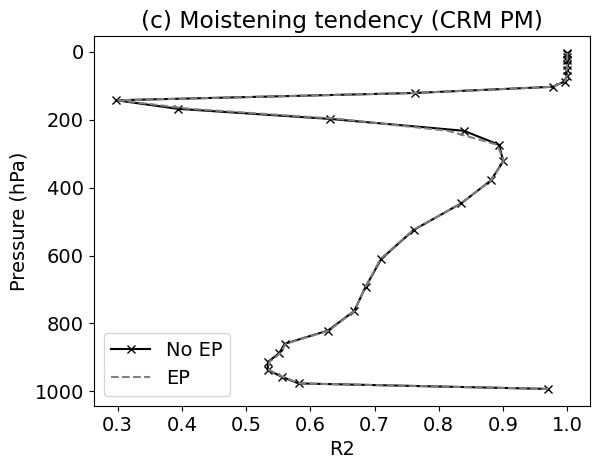

In [8]:
lev = np.array([  3.64346569,   7.59481965,  14.35663225,  24.61222   ,
                    38.26829977,  54.59547974,  72.01245055,  87.82123029,
                   103.31712663, 121.54724076, 142.99403876, 168.22507977,
                   197.9080867 , 232.82861896, 273.91081676, 322.24190235,
                   379.10090387, 445.9925741 , 524.68717471, 609.77869481,
                   691.38943031, 763.40448111, 820.85836865, 859.53476653,
                   887.02024892, 912.64454694, 936.19839847, 957.48547954,
                   976.32540739, 992.55609512])
plt.rcParams.update({'font.size': 14})

plt.title("(c) Moistening tendency (CRM PM)")
plt.plot(our1117_norp["curr"]["0_29"]["level"]["r2"], lev, color="black", marker="x", label="No EP")
#plt.plot(our1["curr"]["0_29"]["level"]["r2"], lev, color="red", marker="o", label="Ours(Seed1)")
# plt.plot(our1["curr"]["0_29"]["level"]["r2"], lev, color=our_colors[1117], label="Ours(Seed1117)")
# plt.plot(our1["curr_2step"]["0_29"]["level"]["r2"], lev, color="grey", marker="o",label="Ours(Seed1)-2step")
# plt.plot(our1117["curr"]["0_29"]["level"]["r2"], lev, color="red", marker="^", label="Ours(Seed1117)")
# plt.plot(our1117["curr"]["0_29"]["level"]["r2"], lev, color=our_colors[1], label="Ours(Seed1)")
# plt.plot(our1117["curr_2step"]["0_29"]["level"]["r2"], lev, color="grey", marker="^",label="Ours(Seed1117)-2step")
plt.plot(our1215["curr"]["0_29"]["level"]["r2"], lev, color=our_colors[1215], linestyle="--", label="EP")
plt.xlabel("R2")

plt.ylabel("Pressure (hPa)")
plt.gca().invert_yaxis()
plt.legend()

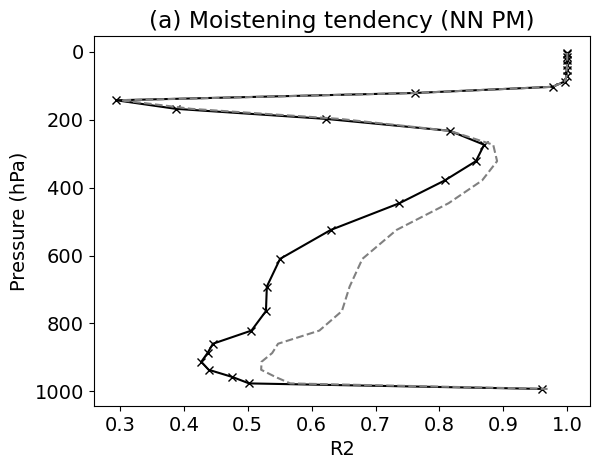

In [9]:
lev = np.array([  3.64346569,   7.59481965,  14.35663225,  24.61222   ,
                    38.26829977,  54.59547974,  72.01245055,  87.82123029,
                   103.31712663, 121.54724076, 142.99403876, 168.22507977,
                   197.9080867 , 232.82861896, 273.91081676, 322.24190235,
                   379.10090387, 445.9925741 , 524.68717471, 609.77869481,
                   691.38943031, 763.40448111, 820.85836865, 859.53476653,
                   887.02024892, 912.64454694, 936.19839847, 957.48547954,
                   976.32540739, 992.55609512])
plt.rcParams.update({'font.size': 14})

plt.title("(a) Moistening tendency (NN PM)")
plt.plot(our1117_norp["curr_2step"]["0_29"]["level"]["r2"], lev, color="black", marker="x", label="No Adaptive Memory Perturbation")
#plt.plot(our1["curr"]["0_29"]["level"]["r2"], lev, color="red", marker="o", label="Ours(Seed1)")
# plt.plot(our1["curr"]["0_29"]["level"]["r2"], lev, color=our_colors[1117], label="Ours(Seed1117)")
# plt.plot(our1["curr_2step"]["0_29"]["level"]["r2"], lev, color="grey", marker="o",label="Ours(Seed1)-2step")
# plt.plot(our1117["curr"]["0_29"]["level"]["r2"], lev, color="red", marker="^", label="Ours(Seed1117)")
# plt.plot(our1117["curr"]["0_29"]["level"]["r2"], lev, color=our_colors[1], label="Ours(Seed1)")
# plt.plot(our1117["curr_2step"]["0_29"]["level"]["r2"], lev, color="grey", marker="^",label="Ours(Seed1117)-2step")
plt.plot(our1215["curr_2step"]["0_29"]["level"]["r2"], lev, color=our_colors[1215], linestyle="--", label="Adpative Memory Perturbation")
plt.xlabel("R2")

plt.ylabel("Pressure (hPa)")
plt.gca().invert_yaxis()
# plt.legend()

Text(0.5, 0, 'R2')

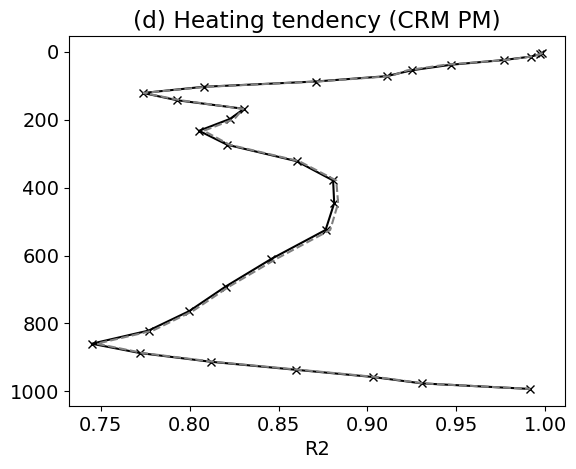

In [10]:
baseline_029[baseline_029<0] = 0
plt.title("(d) Heating tendency (CRM PM)")
# plt.plot(baseline_3059, lev, color="green", label="Wang2022")
#plt.plot(our1["curr"]["30_59"]["level"]["r2"], lev, color="red", marker="o", label="Ours(Seed1)")
plt.plot(our1117_norp["curr"]["30_59"]["level"]["r2"], lev, color="black", marker="x", label="No Adaptive Memory Perturbation")
# plt.plot(our1["curr_2step"]["30_59"]["level"]["r2"], lev, color="grey", marker="o",label="Ours(Seed1)-2step")
# plt.plot(our1117["curr"]["30_59"]["level"]["r2"], lev, color=our_colors[1117], label="Ours(Seed1117)")
# plt.plot(our1117["curr_2step"]["30_59"]["level"]["r2"], lev, color="grey", marker="^",label="Ours(Seed1117)-2step")
plt.plot(our1215["curr"]["30_59"]["level"]["r2"], lev, color=our_colors[1215], linestyle="--",label="Adaptive Memory Perturbation")
plt.gca().invert_yaxis()
plt.xlabel("R2")
# plt.legend()

Text(0.5, 0, 'R2')

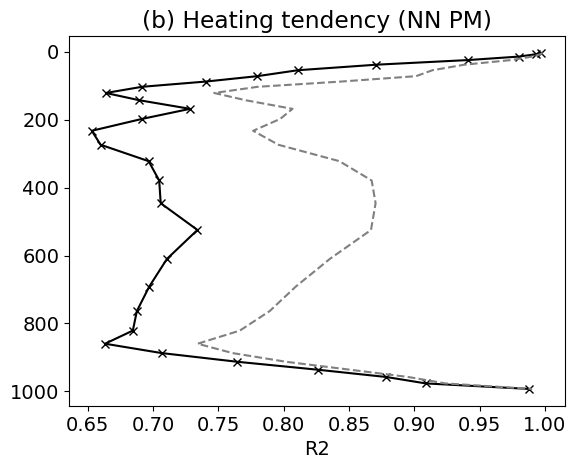

In [11]:
baseline_029[baseline_029<0] = 0
plt.title("(b) Heating tendency (NN PM)")
# plt.plot(baseline_3059, lev, color="green", label="Wang2022")
#plt.plot(our1["curr"]["30_59"]["level"]["r2"], lev, color="red", marker="o", label="Ours(Seed1)")
plt.plot(our1117_norp["curr_2step"]["30_59"]["level"]["r2"], lev, color="black", marker="x", label="No Adaptive Memory Perturbation")
# plt.plot(our1["curr_2step"]["30_59"]["level"]["r2"], lev, color="grey", marker="o",label="Ours(Seed1)-2step")
# plt.plot(our1117["curr"]["30_59"]["level"]["r2"], lev, color=our_colors[1117], label="Ours(Seed1117)")
# plt.plot(our1117["curr_2step"]["30_59"]["level"]["r2"], lev, color="grey", marker="^",label="Ours(Seed1117)-2step")
plt.plot(our1215["curr_2step"]["30_59"]["level"]["r2"], lev, color=our_colors[1215], linestyle="--",label="Adaptive Memory Perturbation")
plt.gca().invert_yaxis()
plt.xlabel("R2")
# plt.legend()

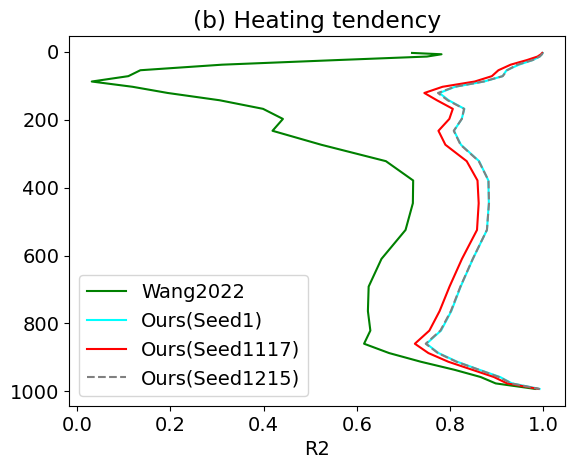

In [12]:
baseline_029[baseline_029<0] = 0
plt.title("(b) Heating tendency")
plt.plot(baseline_3059, lev, color="green", label="Wang2022")
#plt.plot(our1["curr"]["30_59"]["level"]["r2"], lev, color="red", marker="o", label="Ours(Seed1)")
plt.plot(our1["curr"]["30_59"]["level"]["r2"], lev, color=our_colors[1], label="Ours(Seed1)")
# plt.plot(our1["curr_2step"]["30_59"]["level"]["r2"], lev, color="grey", marker="o",label="Ours(Seed1)-2step")
plt.plot(our1117["curr"]["30_59"]["level"]["r2"], lev, color=our_colors[1117], label="Ours(Seed1117)")
# plt.plot(our1117["curr_2step"]["30_59"]["level"]["r2"], lev, color="grey", marker="^",label="Ours(Seed1117)-2step")
plt.plot(our1215["curr"]["30_59"]["level"]["r2"], lev, color=our_colors[1215], linestyle="--",label="Ours(Seed1215)")
plt.gca().invert_yaxis()
plt.xlabel("R2")
plt.legend()

(70080, 5)
(350401, 5)
['SPCAM', 'Wang2022', 'CAM5', 'Ours(Seed1117)', 'Ours(Seed1)', 'Ours(Seed1215)', 'No Experience Replay']


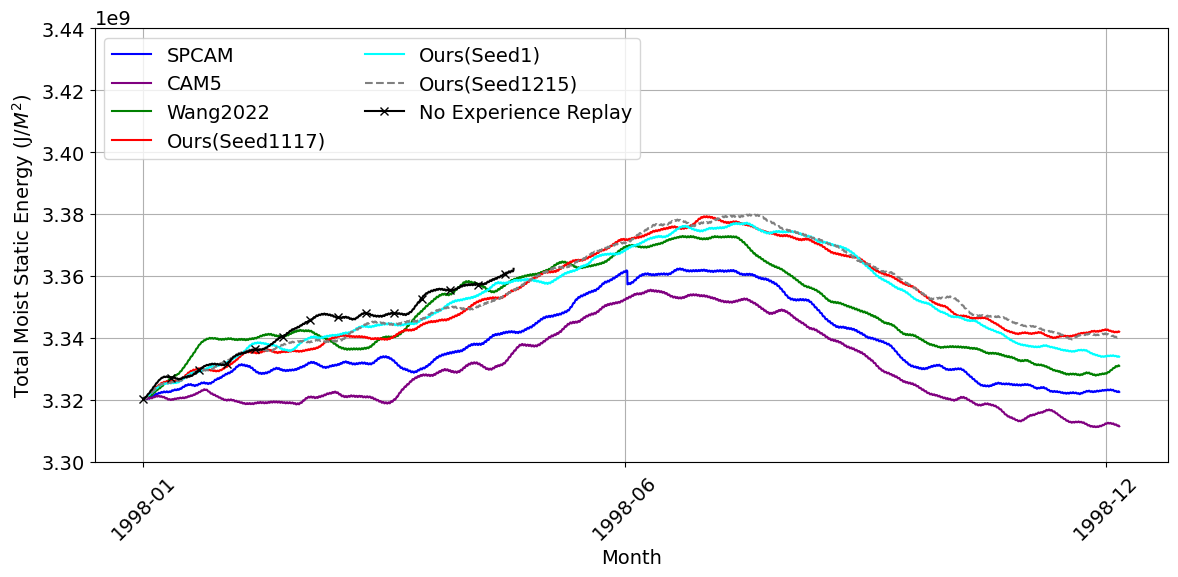

In [13]:
# 1. global energy vs. months
# SPCAM atm.log plot
energy_origin = np.loadtxt(DATA_PATH + "atm.log.analysis/spcam.baseline.logs/energy.baseline.log")
diag_energy_1      = np.copy(energy_origin[:-1])
diag_energy_1[:,0] = energy_origin[:-1,0]
del energy_origin

energy_origin = np.loadtxt(DATA_PATH + "atm.log.analysis/spcam.baseline.logs/energy.199807-200112.log")
diag_energy_2      = np.copy(energy_origin)
diag_energy_2[:,0] = energy_origin[:,0] - 26209 + 8688
del energy_origin

spcam_energy = np.concatenate((diag_energy_1, diag_energy_2))
print(spcam_energy.shape)

# CAM5 atm.log plot
energy_origin = np.loadtxt(DATA_PATH + "energy_curves/energy.cam5.log")
cam5_energy      = np.copy(energy_origin)
cam5_energy[:,0] = energy_origin[:,0]
print(cam5_energy.shape)

del energy_origin

from datetime import datetime,timedelta
from dateutil.relativedelta import relativedelta
fig, axs = plt.subplots(1, 1, figsize=(12,6))
plot_step = 17520*1
# axs.plot(couple_energy_old_25[:,0], couple_energy_old_25[:,1], label = "{}".format(plotname[0]), color='red', linestyle='--')  # color='orange';'green';'blue'
# axs.plot(couple_energy_rep_25[:,0], couple_energy_rep_25[:,1], label = "{}".format(plotname[1]), color='red')
# axs.plot(couple_energy_old_45[:,0], couple_energy_old_45[:,1], label = "{}".format(plotname[2]), color='orange', linestyle='--') # color='orange';'green';'blue'
# axs.plot(couple_energy_rep_45[:,0], couple_energy_rep_45[:,1], label = "{}".format(plotname[3]), color='orange')
baseline_energy = np.load(DATA_PATH+"energy_curves/energy.atm.log.baseline.npy")
# baseline_energy = np.load("energy_curves/energy.baseline_full.npy")
conv_mem_energy = np.load(DATA_PATH+"energy_curves/energy.atm.log.conv_mem_norh.npy")
noconv_mem_energy3 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step.npy")
noconv_mem_energy_spin20 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step_spin20.npy")
noconv_mem_energy_spin5 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step_spin5.npy")
noconv_mem_energy_spin0_1117 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step_nospinup1117.npy")
noconv_mem_energy_spin0 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step_nospinup.npy")
replay_buffer_energy_spin5 = np.load(DATA_PATH+"energy_curves/energy.replay_spinup5.npy")
replay_buffer_energy = np.load(DATA_PATH+"energy_curves/energy.atm.log.replay_buffer.npy")
replay_buffer_energy_spin20 = np.load(DATA_PATH+"energy_curves/energy.log.replay_buffer_spin20.npy")
replay_buffer_energy_spin5_full = np.load(DATA_PATH+"energy_curves/energy.atm.log.rb_spin5_1_full.npy")
rb_1117_full = np.load(DATA_PATH+"energy_curves/energy.atm.log.rb_spin5_1117_full.npy")
rb_1215_full = np.load(DATA_PATH+"energy_curves/energy.rb1215.npy")
norb1 = np.load(DATA_PATH+"energy_curves/energy.norb1.npy")
axs.plot(spcam_energy[:plot_step,0], spcam_energy[:plot_step,1], label = "{}".format("SPCAM"), color='blue')
# axs.plot(conv_mem_energy[:plot_step,0], conv_mem_energy[:plot_step,1], label = "{}".format("NoMultiStepLoss"), color='lightblue', marker="x", markevery=100)
# axs.plot(noconv_mem_energy3[:plot_step,0], noconv_mem_energy3[:plot_step,1], label = "{}".format("no_conv_mem_spin10"), color='black', marker="o", markevery=1000)
# axs.plot(noconv_mem_energy_spin20[:plot_step,0], noconv_mem_energy_spin20[:plot_step,1], label = "{}".format("no_conv_mem_spin20"), color='orange', marker="o", markevery=1000)
# axs.plot(noconv_mem_energy_spin5[:plot_step,0], noconv_mem_energy_spin5[:plot_step,1], label = "{}".format("no_conv_mem_spin5"), color='purple', marker="o", markevery=1000)
# axs.plot(noconv_mem_energy_spin0[:plot_step,0], noconv_mem_energy_spin0[:plot_step,1], label = "{}".format("no_conv_mem_spin0"), color='cyan', marker="o", markevery=1000)
# axs.plot(replay_buffer_energy[:plot_step,0], replay_buffer_energy[:plot_step,1], label = "{}".format("replay_buffer_spin10"), color='black', linestyle="-", marker="x", markevery=1000)
# axs.plot(replay_buffer_energy_spin20[:plot_step,0], replay_buffer_energy_spin20[:plot_step,1], label = "{}".format("replay_buffer_spin20"), color='orange', marker="x", markevery=1000)
# axs.plot(replay_buffer_energy_spin5[:plot_step,0], replay_buffer_energy_spin5[:plot_step,1], label = "{}".format("replay_buffer_spin5"), color='purple', marker="x", markevery=1000)
# axs.plot(noconv_mem_energy_spin0_1117[:plot_step,0], noconv_mem_energy_spin0_1117[:plot_step,1], label = "{}".format("no_conv_mem_spin5_seed1117"), color='pink', marker="o", markevery=1000)
# axs.plot(rb_1117[:plot_step,0], rb_1117[:plot_step,1], label = "{}".format("replay_buffer_spin5_seed1117"), color='pink', marker="x", markevery=1000)
# axs.plot(nncam_rh[:plot_step,0], nncam_rh[:plot_step,1], label="Wang2023(PhysC)", color="orange")
cam5 = np.loadtxt("/Users/jianda/Projects/PaperWriting/replaybuffer/plot_data/energy_curves/energy.cam5.log", dtype=str)
axs.plot(baseline_energy[:plot_step,0], baseline_energy[:plot_step,1], label = "{}".format("Wang2022"), color='green')
axs.plot(cam5_energy[:plot_step,0], cam5_energy[:plot_step,1], label="CAM5", color="purple")
axs.plot(rb_1117_full[:plot_step,0], rb_1117_full[:plot_step,1], label = "{}".format("Ours(Seed1117)"), color=our_colors[1117])
axs.plot(replay_buffer_energy_spin5_full[:plot_step,0], replay_buffer_energy_spin5_full[:plot_step,1], label="Ours(Seed1)", color=our_colors[1])
axs.plot(rb_1215_full[:plot_step,0], rb_1215_full[:plot_step,1], label = "{}".format("Ours(Seed1215)"), linestyle="--", color=our_colors[1215])
axs.plot(norb1[:plot_step,0], norb1[:plot_step,1], label="No Experience Replay", color="black", marker="x", markevery=500)
for fn in os.listdir("/Users/jianda/Projects/experience_replay_data"):
    if fn.endswith(".npy") and fn.startswith("energy"):
        print(fn)
        energy_data = np.load(os.path.join("/Users/jianda/Projects/experience_replay_data", fn))
        axs.plot(energy_data[:plot_step,0], energy_data[:plot_step,1], label=fn.split(".")[0])
# axs.plot(rb1117_noprevqt[:plot_step,0], rb1117_noprevqt[:plot_step,1], label="MultistepLoss(noPrevQT)", color="c", marker="^", markevery=1000)
axs.set_ylim(3.3e9, 3.44e9)

start_date = datetime(1998, 1, 1)
plt.rcParams.update({'font.size': 14})

# List of months since the starting date
# model_steps = spcam_energy[:plot_step, 0]  # example list
model_steps = range(0, plot_step + 1, 6 * 24 * 30 * 60 // 30)

# Convert to actual dates
months = [(start_date + timedelta(minutes=step * 30)).strftime('%Y-%m') for step in model_steps]
formatted_dates = [(start_date + timedelta(minutes=step * 30)).strftime('%Y-%m') for step in model_steps]
# # Print the results
# for month in formatted_dates:
#     print(month)
axs.set_xticks(model_steps)
axs.set_xticklabels(formatted_dates, rotation=45)

# Print the results
axs.set_xlabel('Month')
axs.set_ylabel(r'Total Moist Static Energy (J/$M^2$)')
axs.grid(True)
# axs.legend(loc="lower right", bbox_to_anchor=(1.35,0.0))
handles, labels = axs.get_legend_handles_labels()
print(labels)
order = [0,2,1,3,4,5,6]
axs.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="upper left", ncols=2)

fig.tight_layout()
plt.show()

(70080, 5)
(350401, 5)


FileNotFoundError: /Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/energy_curves/energy.cam5.log not found.

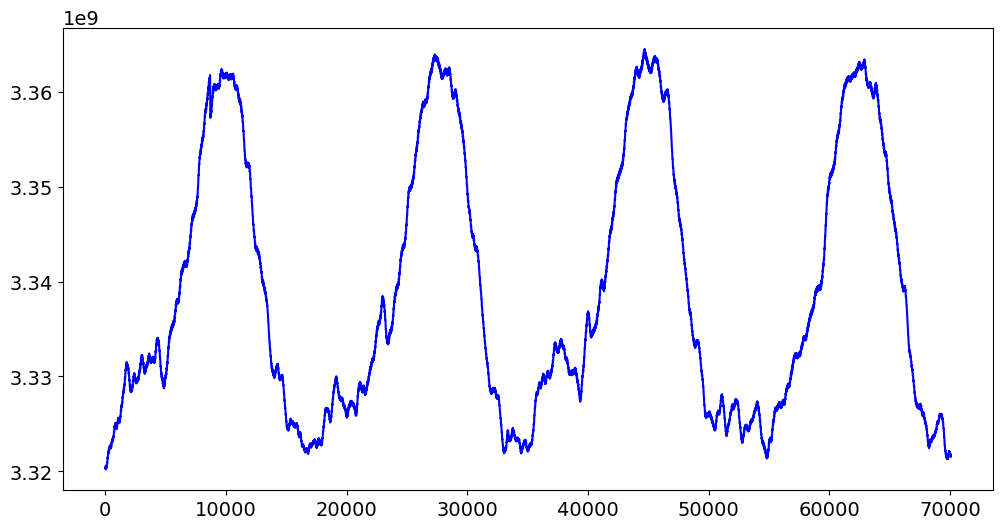

In [14]:
# 1. global energy vs. months
# SPCAM atm.log plot
energy_origin = np.loadtxt(DATA_PATH + "atm.log.analysis/spcam.baseline.logs/energy.baseline.log")
diag_energy_1      = np.copy(energy_origin[:-1])
diag_energy_1[:,0] = energy_origin[:-1,0]
del energy_origin

energy_origin = np.loadtxt(DATA_PATH + "atm.log.analysis/spcam.baseline.logs/energy.199807-200112.log")
diag_energy_2      = np.copy(energy_origin)
diag_energy_2[:,0] = energy_origin[:,0] - 26209 + 8688
del energy_origin

spcam_energy = np.concatenate((diag_energy_1, diag_energy_2))
print(spcam_energy.shape)

# CAM5 atm.log plot
energy_origin = np.loadtxt(DATA_PATH + "energy_curves/energy.cam5.log")
cam5_energy      = np.copy(energy_origin)
cam5_energy[:,0] = energy_origin[:,0]
print(cam5_energy.shape)

del energy_origin

from datetime import datetime,timedelta
from dateutil.relativedelta import relativedelta
fig, axs = plt.subplots(1, 1, figsize=(12,6))
plot_step = 17520*6
# axs.plot(couple_energy_old_25[:,0], couple_energy_old_25[:,1], label = "{}".format(plotname[0]), color='red', linestyle='--')  # color='orange';'green';'blue'
# axs.plot(couple_energy_rep_25[:,0], couple_energy_rep_25[:,1], label = "{}".format(plotname[1]), color='red')
# axs.plot(couple_energy_old_45[:,0], couple_energy_old_45[:,1], label = "{}".format(plotname[2]), color='orange', linestyle='--') # color='orange';'green';'blue'
# axs.plot(couple_energy_rep_45[:,0], couple_energy_rep_45[:,1], label = "{}".format(plotname[3]), color='orange')
baseline_energy = np.load(DATA_PATH+"energy_curves/energy.atm.log.baseline.npy")
# baseline_energy = np.load("energy_curves/energy.baseline_full.npy")
conv_mem_energy = np.load(DATA_PATH+"energy_curves/energy.atm.log.conv_mem_norh.npy")
noconv_mem_energy3 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step.npy")
noconv_mem_energy_spin20 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step_spin20.npy")
noconv_mem_energy_spin5 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step_spin5.npy")
noconv_mem_energy_spin0_1117 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step_nospinup1117.npy")
noconv_mem_energy_spin0 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step_nospinup.npy")
replay_buffer_energy_spin5 = np.load(DATA_PATH+"energy_curves/energy.replay_spinup5.npy")
replay_buffer_energy = np.load(DATA_PATH+"energy_curves/energy.atm.log.replay_buffer.npy")
replay_buffer_energy_spin20 = np.load(DATA_PATH+"energy_curves/energy.log.replay_buffer_spin20.npy")
replay_buffer_energy_spin5_full = np.load(DATA_PATH+"energy_curves/energy.atm.log.rb_spin5_1_full.npy")
rb_1117_full = np.load(DATA_PATH+"energy_curves/energy.atm.log.rb_spin5_1117_full.npy")
rb_1215_full = np.load(DATA_PATH+"energy_curves/energy.rb1215.npy")
norb1 = np.load(DATA_PATH+"energy_curves/energy.norb1.npy")
axs.plot(spcam_energy[:plot_step,0], spcam_energy[:plot_step,1], label = "{}".format("SPCAM"), color='blue')
# axs.plot(conv_mem_energy[:plot_step,0], conv_mem_energy[:plot_step,1], label = "{}".format("NoMultiStepLoss"), color='lightblue', marker="x", markevery=100)
# axs.plot(noconv_mem_energy3[:plot_step,0], noconv_mem_energy3[:plot_step,1], label = "{}".format("no_conv_mem_spin10"), color='black', marker="o", markevery=1000)
# axs.plot(noconv_mem_energy_spin20[:plot_step,0], noconv_mem_energy_spin20[:plot_step,1], label = "{}".format("no_conv_mem_spin20"), color='orange', marker="o", markevery=1000)
# axs.plot(noconv_mem_energy_spin5[:plot_step,0], noconv_mem_energy_spin5[:plot_step,1], label = "{}".format("no_conv_mem_spin5"), color='purple', marker="o", markevery=1000)
# axs.plot(noconv_mem_energy_spin0[:plot_step,0], noconv_mem_energy_spin0[:plot_step,1], label = "{}".format("no_conv_mem_spin0"), color='cyan', marker="o", markevery=1000)
# axs.plot(replay_buffer_energy[:plot_step,0], replay_buffer_energy[:plot_step,1], label = "{}".format("replay_buffer_spin10"), color='black', linestyle="-", marker="x", markevery=1000)
# axs.plot(replay_buffer_energy_spin20[:plot_step,0], replay_buffer_energy_spin20[:plot_step,1], label = "{}".format("replay_buffer_spin20"), color='orange', marker="x", markevery=1000)
# axs.plot(replay_buffer_energy_spin5[:plot_step,0], replay_buffer_energy_spin5[:plot_step,1], label = "{}".format("replay_buffer_spin5"), color='purple', marker="x", markevery=1000)
# axs.plot(noconv_mem_energy_spin0_1117[:plot_step,0], noconv_mem_energy_spin0_1117[:plot_step,1], label = "{}".format("no_conv_mem_spin5_seed1117"), color='pink', marker="o", markevery=1000)
# axs.plot(rb_1117[:plot_step,0], rb_1117[:plot_step,1], label = "{}".format("replay_buffer_spin5_seed1117"), color='pink', marker="x", markevery=1000)
# axs.plot(nncam_rh[:plot_step,0], nncam_rh[:plot_step,1], label="Wang2023(PhysC)", color="orange")
cam5 = np.loadtxt("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/energy_curves/energy.cam5.log", dtype=str)
axs.plot(baseline_energy[:plot_step,0], baseline_energy[:plot_step,1], label = "{}".format("Wang2022"), color='green')
axs.plot(cam5_energy[:plot_step,0], cam5_energy[:plot_step,1], label="CAM5", color="purple")
axs.plot(rb_1117_full[:plot_step,0], rb_1117_full[:plot_step,1], label = "{}".format("Ours(Seed1117)"), color=our_colors[1117])
axs.plot(replay_buffer_energy_spin5_full[:plot_step,0], replay_buffer_energy_spin5_full[:plot_step,1], label="Ours(Seed1)", color=our_colors[1])
axs.plot(rb_1215_full[:plot_step,0], rb_1215_full[:plot_step,1], label = "{}".format("Ours(Seed1215)"), linestyle="--", color=our_colors[1215])
axs.plot(norb1[:plot_step,0], norb1[:plot_step,1], label="No Experience Replay", color="black", marker="x", markevery=500)
# axs.plot(rb1117_noprevqt[:plot_step,0], rb1117_noprevqt[:plot_step,1], label="MultistepLoss(noPrevQT)", color="c", marker="^", markevery=1000)
axs.set_ylim(3.3e9, 3.44e9)

start_date = datetime(1998, 1, 1)
plt.rcParams.update({'font.size': 14})

# List of months since the starting date
# model_steps = spcam_energy[:plot_step, 0]  # example list
model_steps = range(0, plot_step + 1, 6 * 24 * 30 * 60 // 30)

# Convert to actual dates
months = [(start_date + timedelta(minutes=step * 30)).strftime('%Y-%m') for step in model_steps]
formatted_dates = [(start_date + timedelta(minutes=step * 30)).strftime('%Y-%m') for step in model_steps]
# # Print the results
# for month in formatted_dates:
#     print(month)
axs.set_xticks(model_steps)
axs.set_xticklabels(formatted_dates, rotation=45)

# Print the results
axs.set_xlabel('Month')
axs.set_ylabel(r'Total Moist Static Energy (J/$M^2$)')
axs.grid(True)
# axs.legend(loc="lower right", bbox_to_anchor=(1.35,0.0))
handles, labels = axs.get_legend_handles_labels()
print(labels)
order = [0,2,1,3,4,5,6]
axs.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="upper left", ncols=2)

fig.tight_layout()
plt.show()

(70080, 5)
(350401, 5)
['SPCAM', 'Wang2022', 'CAM5']


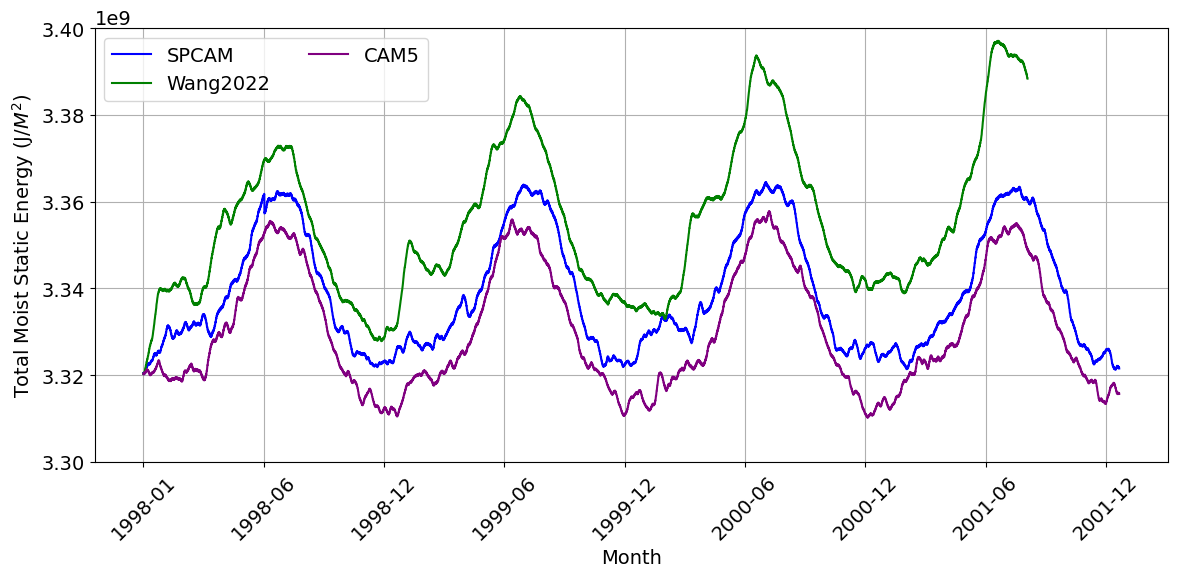

In [17]:
# 1. global energy vs. months
# SPCAM atm.log plot
energy_origin = np.loadtxt(DATA_PATH + "atm.log.analysis/spcam.baseline.logs/energy.baseline.log")
diag_energy_1      = np.copy(energy_origin[:-1])
diag_energy_1[:,0] = energy_origin[:-1,0]
del energy_origin

energy_origin = np.loadtxt(DATA_PATH + "atm.log.analysis/spcam.baseline.logs/energy.199807-200112.log")
diag_energy_2      = np.copy(energy_origin)
diag_energy_2[:,0] = energy_origin[:,0] - 26209 + 8688
del energy_origin

spcam_energy = np.concatenate((diag_energy_1, diag_energy_2))
print(spcam_energy.shape)

# CAM5 atm.log plot
energy_origin = np.loadtxt(DATA_PATH + "energy_curves/energy.cam5.log")
cam5_energy      = np.copy(energy_origin)
cam5_energy[:,0] = energy_origin[:,0]
print(cam5_energy.shape)

del energy_origin

from datetime import datetime,timedelta
from dateutil.relativedelta import relativedelta
fig, axs = plt.subplots(1, 1, figsize=(12,6))
plot_step = 17520*4
# axs.plot(couple_energy_old_25[:,0], couple_energy_old_25[:,1], label = "{}".format(plotname[0]), color='red', linestyle='--')  # color='orange';'green';'blue'
# axs.plot(couple_energy_rep_25[:,0], couple_energy_rep_25[:,1], label = "{}".format(plotname[1]), color='red')
# axs.plot(couple_energy_old_45[:,0], couple_energy_old_45[:,1], label = "{}".format(plotname[2]), color='orange', linestyle='--') # color='orange';'green';'blue'
# axs.plot(couple_energy_rep_45[:,0], couple_energy_rep_45[:,1], label = "{}".format(plotname[3]), color='orange')
baseline_energy = np.load(DATA_PATH+"energy_curves/energy.atm.log.baseline.npy")
# baseline_energy = np.load("energy_curves/energy.baseline_full.npy")
conv_mem_energy = np.load(DATA_PATH+"energy_curves/energy.atm.log.conv_mem_norh.npy")
noconv_mem_energy3 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step.npy")
noconv_mem_energy_spin20 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step_spin20.npy")
noconv_mem_energy_spin5 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step_spin5.npy")
noconv_mem_energy_spin0_1117 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step_nospinup1117.npy")
noconv_mem_energy_spin0 = np.load(DATA_PATH+"energy_curves/energy.atm.log.single_step_nospinup.npy")
replay_buffer_energy_spin5 = np.load(DATA_PATH+"energy_curves/energy.replay_spinup5.npy")
replay_buffer_energy = np.load(DATA_PATH+"energy_curves/energy.atm.log.replay_buffer.npy")
replay_buffer_energy_spin20 = np.load(DATA_PATH+"energy_curves/energy.log.replay_buffer_spin20.npy")
replay_buffer_energy_spin5_full = np.load(DATA_PATH+"energy_curves/energy.atm.log.rb_spin5_1_full.npy")
rb_1117_full = np.load(DATA_PATH+"energy_curves/energy.atm.log.rb_spin5_1117_full.npy")
rb_1215_full = np.load(DATA_PATH+"energy_curves/energy.rb1215.npy")
norb1 = np.load(DATA_PATH+"energy_curves/energy.norb1.npy")
axs.plot(spcam_energy[:plot_step,0], spcam_energy[:plot_step,1], label = "{}".format("SPCAM"), color='blue')
# axs.plot(conv_mem_energy[:plot_step,0], conv_mem_energy[:plot_step,1], label = "{}".format("NoMultiStepLoss"), color='lightblue', marker="x", markevery=100)
# axs.plot(noconv_mem_energy3[:plot_step,0], noconv_mem_energy3[:plot_step,1], label = "{}".format("no_conv_mem_spin10"), color='black', marker="o", markevery=1000)
# axs.plot(noconv_mem_energy_spin20[:plot_step,0], noconv_mem_energy_spin20[:plot_step,1], label = "{}".format("no_conv_mem_spin20"), color='orange', marker="o", markevery=1000)
# axs.plot(noconv_mem_energy_spin5[:plot_step,0], noconv_mem_energy_spin5[:plot_step,1], label = "{}".format("no_conv_mem_spin5"), color='purple', marker="o", markevery=1000)
# axs.plot(noconv_mem_energy_spin0[:plot_step,0], noconv_mem_energy_spin0[:plot_step,1], label = "{}".format("no_conv_mem_spin0"), color='cyan', marker="o", markevery=1000)
# axs.plot(replay_buffer_energy[:plot_step,0], replay_buffer_energy[:plot_step,1], label = "{}".format("replay_buffer_spin10"), color='black', linestyle="-", marker="x", markevery=1000)
# axs.plot(replay_buffer_energy_spin20[:plot_step,0], replay_buffer_energy_spin20[:plot_step,1], label = "{}".format("replay_buffer_spin20"), color='orange', marker="x", markevery=1000)
# axs.plot(replay_buffer_energy_spin5[:plot_step,0], replay_buffer_energy_spin5[:plot_step,1], label = "{}".format("replay_buffer_spin5"), color='purple', marker="x", markevery=1000)
# axs.plot(noconv_mem_energy_spin0_1117[:plot_step,0], noconv_mem_energy_spin0_1117[:plot_step,1], label = "{}".format("no_conv_mem_spin5_seed1117"), color='pink', marker="o", markevery=1000)
# axs.plot(rb_1117[:plot_step,0], rb_1117[:plot_step,1], label = "{}".format("replay_buffer_spin5_seed1117"), color='pink', marker="x", markevery=1000)
# axs.plot(nncam_rh[:plot_step,0], nncam_rh[:plot_step,1], label="Wang2023(PhysC)", color="orange")
cam5 = np.loadtxt("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/energy_curves/energy.cam5.log", dtype=str)
axs.plot(baseline_energy[:plot_step,0], baseline_energy[:plot_step,1], label = "{}".format("Wang2022"), color='green')
axs.plot(cam5_energy[:plot_step,0], cam5_energy[:plot_step,1], label="CAM5", color="purple")
# axs.plot(rb_1117_full[:plot_step,0], rb_1117_full[:plot_step,1], label = "{}".format("Ours(Seed1117)"), color=our_colors[1117])
# axs.plot(replay_buffer_energy_spin5_full[:plot_step,0], replay_buffer_energy_spin5_full[:plot_step,1], label="Ours(Seed1)", color=our_colors[1])
# axs.plot(rb_1215_full[:plot_step,0], rb_1215_full[:plot_step,1], label = "{}".format("Ours(Seed1215)"), linestyle="--", color=our_colors[1215])
# axs.plot(norb1[:plot_step,0], norb1[:plot_step,1], label="No Experience Replay", color="black", marker="x", markevery=500)
# axs.plot(rb1117_noprevqt[:plot_step,0], rb1117_noprevqt[:plot_step,1], label="MultistepLoss(noPrevQT)", color="c", marker="^", markevery=1000)
axs.set_ylim(3.3e9, 3.40e9)

start_date = datetime(1998, 1, 1)
plt.rcParams.update({'font.size': 14})

# List of months since the starting date
# model_steps = spcam_energy[:plot_step, 0]  # example list
model_steps = range(0, plot_step + 1, 6 * 24 * 30 * 60 // 30)

# Convert to actual dates
months = [(start_date + timedelta(minutes=step * 30)).strftime('%Y-%m') for step in model_steps]
formatted_dates = [(start_date + timedelta(minutes=step * 30)).strftime('%Y-%m') for step in model_steps]
# # Print the results
# for month in formatted_dates:
#     print(month)
axs.set_xticks(model_steps)
axs.set_xticklabels(formatted_dates, rotation=45)

# Print the results
axs.set_xlabel('Month')
axs.set_ylabel(r'Total Moist Static Energy (J/$M^2$)')
axs.grid(True)
# axs.legend(loc="lower right", bbox_to_anchor=(1.35,0.0))
handles, labels = axs.get_legend_handles_labels()
print(labels)
order = [0,2,1,3,4,5,6]
# axs.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="upper left", ncols=2)
axs.legend(handles, labels, loc="upper left", ncols=2)

fig.tight_layout()
plt.show()

In [15]:
# 2(1). ANN precipiation data prep
jja_precip = np.load(DATA_PATH+"trmm/JJA_precip.npy")
djf_precip = np.load(DATA_PATH+"trmm/DJF_precip.npy")
ann_precip = np.load(DATA_PATH+"trmm/ANN_precip.npy")
print(ann_precip.shape)
cases = ["TRMM", "SPCAM", "Wang2022", "NNCAM(PhyC)", "CAM5", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]
# Earth's radius in kilometers

jlon = np.linspace(0,357.5,144)
jlat = np.linspace(-90,90,96)[22:74]

# Compute the area of each grid cell
area_grid = np.zeros((len(jlat), len(jlon)))

lat_radian = jlat * np.pi / 180

for i, phi in enumerate(lat_radian):
    area = np.cos(phi) 
    area_grid[i, :] = area
# Normalize to get the horizontal mass factor
horizontal_mass_factors = area_grid / np.sum(area_grid)
print("lat weight: ", np.sum(horizontal_mass_factors))
def rmse_weighted(predictions, targets):
  diff = (predictions - targets)
  # print(diff.shape)
  diff_sq = diff ** 2
  # print(diff_sq.shape)
  diff_sq_weighted = diff_sq * horizontal_mass_factors
  return np.sqrt(np.sum(diff_sq_weighted))
  # return np.sqrt((((predictions - targets) ** 2) * horizontal_mass_factors).mean())
def mean_weighted(data):
  # print(diff.shape)
  mean_weighted = data * horizontal_mass_factors
  return np.sum(mean_weighted)

def plot_single_precip(ax, precip, color_interval, cmap):
    
    jlon = np.linspace(0,357.5,144)
    jlat = np.linspace(-90,90,96)[22:74]
    prj = ccrs.PlateCarree()
    # Add longitude and latitude ticks
    ax.set_xticks(np.arange(0, 361, 60), crs=prj)  # Longitude ticks
    ax.set_yticks(np.arange(-90, 91, 30), crs=prj)  # Latitude ticks
    
    # Label ticks with degrees
    lon_labels = [str(lon) + 'E' if lon < 180 else str(360-lon) + 'W' for lon in np.arange(0, 361, 60)]
    lon_labels[lon_labels.index("180W")] = "180"
    lon_labels[lon_labels.index("0W")] = "0"
    lon_labels[lon_labels.index("0E")] = "0"
    lat_labels = [str(lat) + 'N' if lat >= 0 else str(abs(lat)) + 'S' for lat in np.arange(-90, 91, 30)]
    
    ax.set_xticklabels(lon_labels, fontsize=10)
    ax.set_yticklabels(lat_labels, fontsize=10, rotation=45)

    ax.add_feature(cfeat.COASTLINE, edgecolor = '#333333', linewidth=0.5)
    cs0 = ax.contourf(jlon, jlat, precip, color_interval, cmap=cmap, extend='both', transform=prj)
    ax.tick_params(labelsize=10)


is_nan_mask = np.isnan(jja_precip[0])
jja_precip[:,is_nan_mask] = 0
is_nan_mask = np.isnan(ann_precip[0])
ann_precip[:,is_nan_mask] = 0
is_nan_mask = np.isnan(djf_precip[0])
djf_precip[:,is_nan_mask] = 0

(8, 52, 144)
lat weight:  1.0


/var/folders/77/477dplbj7210xzg98wgtl28w0000gn/T/ipykernel_58384/4182513718.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr', len(tick_values)-1)
/var/folders/77/477dplbj7210xzg98wgtl28w0000gn/T/ipykernel_58384/4182513718.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.07, 1, 1])


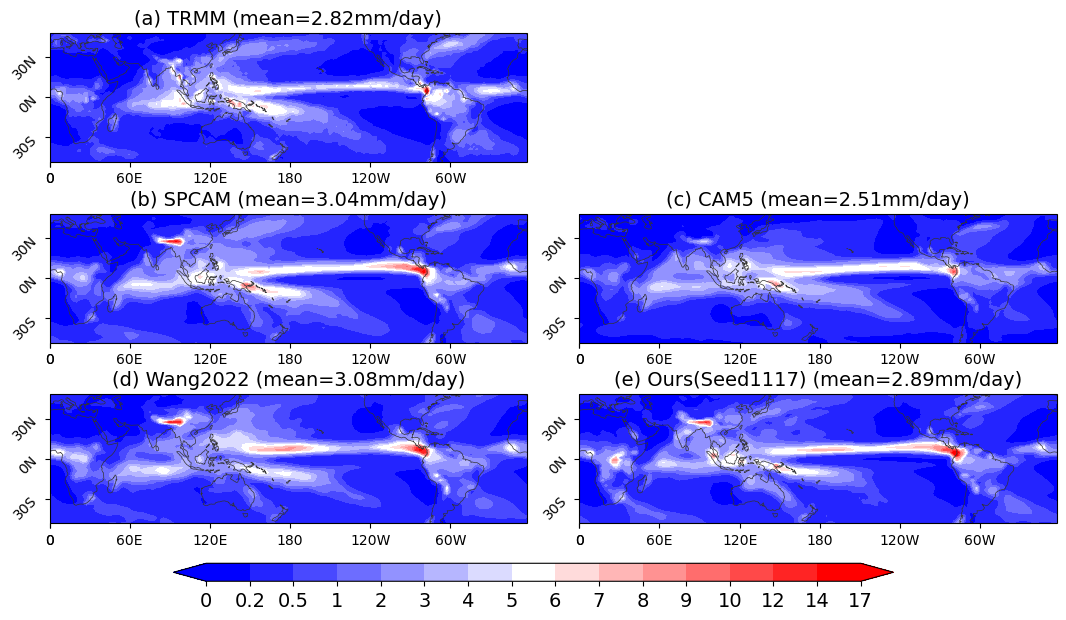

In [16]:
# 2(2) ANN precipiation distribution

# Define the tick values and corresponding boundaries
tick_values = [0,0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17]
boundaries = np.array(tick_values)

# Create a color map and normalization
cmap = cm.get_cmap('bwr', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)[22:74]
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[1, 1])
ax1 = plt.subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax2 = plt.subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax3 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax4 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax5 = plt.subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax6 = plt.subplot(gs[2, 1], projection=ccrs.PlateCarree(central_longitude=180))
cbar_ax = fig.add_axes([0.2, 0.03, 0.6, 0.03])

# Display the data with imshow using the custom colormap and normalization
color_interval = np.linspace(0, 19, 21)
plot_single_precip(ax1, ann_precip[0], color_interval, cmap=cmap)
ax1.set_title(f"(a) TRMM (mean={np.mean(ann_precip[0]):.2f}mm/day)", fontsize=14)
def plot_helper(ax, idx, target_idx, label):
    plot_single_precip(ax, ann_precip[idx], color_interval, cmap=cmap)
    ax.set_title(f"({label}) {cases[idx]} (mean={np.mean(ann_precip[idx]):.2f}mm/day)", fontsize=14)
plot_helper(ax3, 1, 0, 'b')
plot_helper(ax4, 4, 0, 'c')
plot_helper(ax5, 2, 1, 'd')
plot_helper(ax6, 5, 1, 'e')
# plot_helper(ax6, 3, 1, 'f')
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")

# Set the tick positions and labels on the color bar
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, fontsize=14)

plt.tight_layout(rect=[0, 0.07, 1, 1])
plt.subplots_adjust(hspace=0.4, wspace=-0.1)
# Display the plot
plt.show()

/var/folders/77/477dplbj7210xzg98wgtl28w0000gn/T/ipykernel_58384/2772650341.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr', len(tick_values)-1)
/var/folders/77/477dplbj7210xzg98wgtl28w0000gn/T/ipykernel_58384/2772650341.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.07, 1, 1])


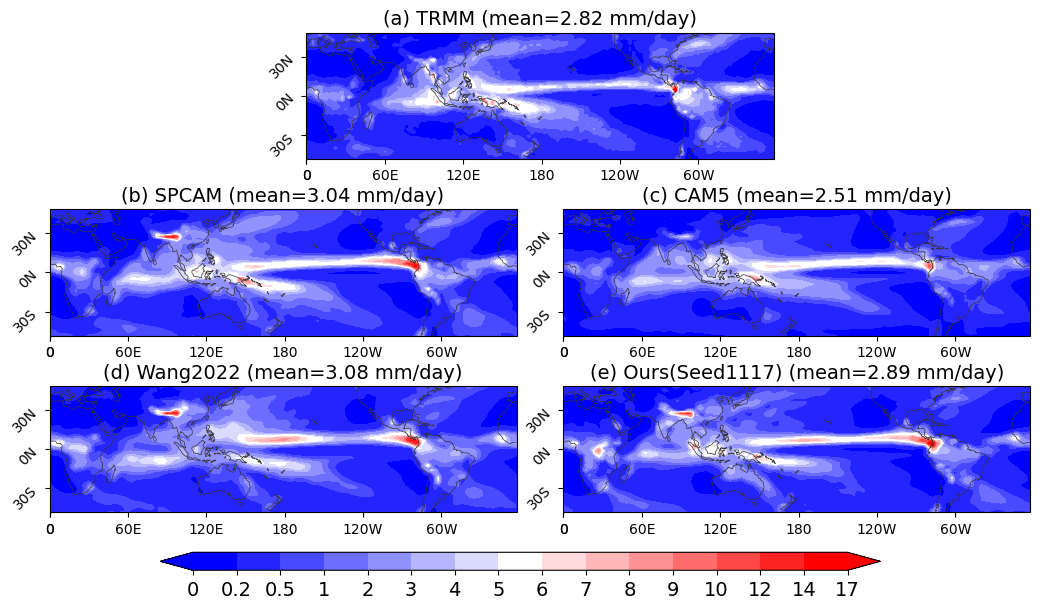

In [17]:
# 2(2) ANN precipiation distribution

# Define the tick values and corresponding boundaries
tick_values = [0,0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17]
boundaries = np.array(tick_values)

# Create a color map and normalization
cmap = cm.get_cmap('bwr', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)[22:74]
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[1, 1])
ax1 = plt.subplot(gs[0, :], projection=ccrs.PlateCarree(central_longitude=180))
# ax2 = plt.subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax3 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax4 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax5 = plt.subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax6 = plt.subplot(gs[2, 1], projection=ccrs.PlateCarree(central_longitude=180))
cbar_ax = fig.add_axes([0.2, 0.03, 0.6, 0.03])

# Display the data with imshow using the custom colormap and normalization
color_interval = np.linspace(0, 19, 21)
plot_single_precip(ax1, ann_precip[0], color_interval, cmap=cmap)
ax1.set_title(f"(a) TRMM (mean={np.mean(ann_precip[0]):.2f} mm/day)", fontsize=14)
def plot_helper(ax, idx, target_idx, label):
    plot_single_precip(ax, ann_precip[idx], color_interval, cmap=cmap)
    ax.set_title(f"({label}) {cases[idx]} (mean={np.mean(ann_precip[idx]):.2f} mm/day)", fontsize=14)
plot_helper(ax3, 1, 0, 'b')
plot_helper(ax4, 4, 0, 'c')
plot_helper(ax5, 2, 1, 'd')
plot_helper(ax6, 5, 1, 'e')
# plot_helper(ax6, 3, 1, 'f')
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")

# Set the tick positions and labels on the color bar
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, fontsize=14)

plt.tight_layout(rect=[0, 0.07, 1, 1])
plt.subplots_adjust(hspace=0.4, wspace=-0.15)
# Display the plot
plt.show()

/var/folders/77/477dplbj7210xzg98wgtl28w0000gn/T/ipykernel_58384/3957710260.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr', len(tick_values)-1)
/var/folders/77/477dplbj7210xzg98wgtl28w0000gn/T/ipykernel_58384/3957710260.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.07, 1, 1])


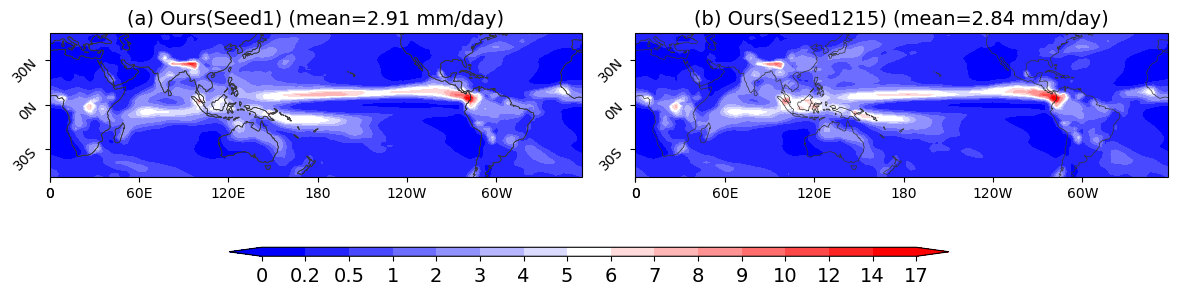

In [18]:
# 2(2) ANN precipiation distribution

# Define the tick values and corresponding boundaries
tick_values = [0,0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17]
boundaries = np.array(tick_values)

# Create a color map and normalization
cmap = cm.get_cmap('bwr', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)[22:74]
fig = plt.figure(figsize=(12, 3))
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0], projection=ccrs.PlateCarree(central_longitude=180))
ax2 = plt.subplot(gs[1], projection=ccrs.PlateCarree(central_longitude=180))
# ax3 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax4 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax5 = plt.subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax6 = plt.subplot(gs[2, 1], projection=ccrs.PlateCarree(central_longitude=180))
cbar_ax = fig.add_axes([0.2, 0.03, 0.6, 0.03])

# Display the data with imshow using the custom colormap and normalization
color_interval = np.linspace(0, 19, 21)
plot_single_precip(ax1, ann_precip[0], color_interval, cmap=cmap)
ax1.set_title(f"(a) TRMM (mean={np.mean(ann_precip[0]):.2f} mm/day)", fontsize=14)
def plot_helper(ax, idx, target_idx, label):
    plot_single_precip(ax, ann_precip[idx], color_interval, cmap=cmap)
    ax.set_title(f"({label}) {cases[idx]} (mean={np.mean(ann_precip[idx]):.2f} mm/day)", fontsize=14)
plot_helper(ax1, 6, 1, 'a')
plot_helper(ax2, 7, 1, 'b')
# plot_helper(ax4, 4, 0, 'c')
# plot_helper(ax5, 2, 1, 'd')
# plot_helper(ax6, 5, 1, 'e')
# plot_helper(ax6, 3, 1, 'f')
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")

# Set the tick positions and labels on the color bar
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, fontsize=14)

plt.tight_layout(rect=[0, 0.07, 1, 1])
plt.subplots_adjust(hspace=0.4, wspace=0.1)
# Display the plot
plt.show()

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_1837/3555462501.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('bwr', len(tick_values)-1)
/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_1837/3555462501.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.01, 1, 1])


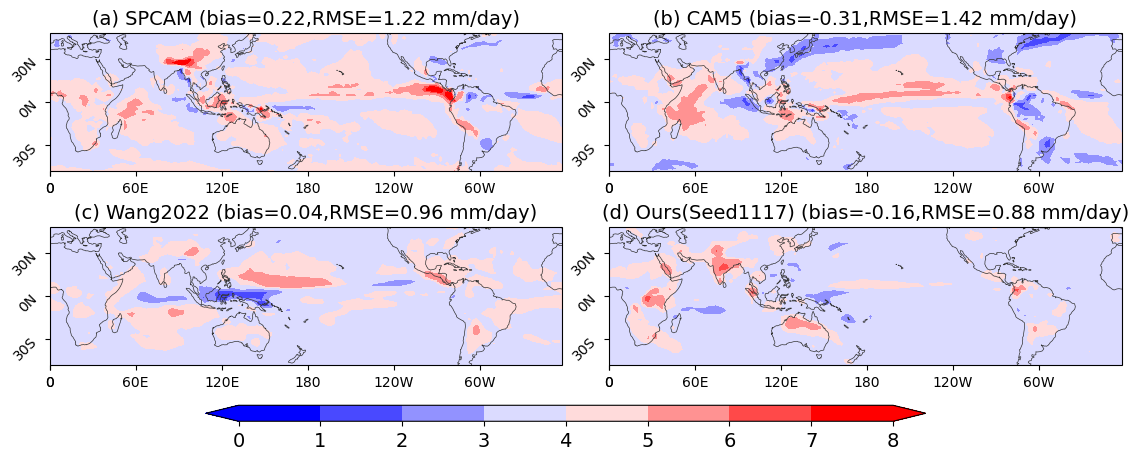

In [12]:
# 2(3) ANN precipiation bias

# Define the tick values and corresponding boundaries
# tick_values = [0,0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17]
tick_values = np.arange(-0,9,1)
boundaries = np.array(tick_values)

# Create a color map and normalization
cmap = cm.get_cmap('bwr', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)[22:74]
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax2 = plt.subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax3 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax4 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax4 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax5 = plt.subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax6 = plt.subplot(gs[2, 1], projection=ccrs.PlateCarree(central_longitude=180))
cbar_ax = fig.add_axes([0.2, -0.05, 0.6, 0.04])
# cax = plt.subplot(gs[2,:])  # This is where the colorbar will be

# Display the data with imshow using the custom colormap and normalization
# ax[0,0].contourf(jja_precip[0,::-1], cmap=cmap, norm=norm)
# color_interval = np.linspace(0, 19, 21)
color_interval = np.linspace(-8, 9, 21)
# plot_single_precip(ax1, ann_precip[0], color_interval, cmap=cmap)
# ax1.set_title(f"TRMM ANN mean {np.mean(ann_precip[0]):.2f} mm/day", font=font)
def plot_helper(ax, idx, target_idx, label):
    plot_single_precip(ax, ann_precip[idx]-ann_precip[target_idx], color_interval, cmap=cmap)
    title = f"({label}) {cases[idx]} (bias={np.mean(ann_precip[idx]-ann_precip[target_idx]):.2f},\
RMSE={rmse_weighted(ann_precip[idx], ann_precip[target_idx]):.2f} mm/day)"
    ax.set_title(title, fontsize=14)
plot_helper(ax1, 1, 0, 'a')
plot_helper(ax2, 4, 0, 'b')
plot_helper(ax3, 2, 1, 'c')
plot_helper(ax4, 5, 1, 'd')
# plot_helper(ax6, 6, 1)
# plot_helper(ax7, 3, 1)
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")
# cbar.set_label("Precipiation mm/day")

# Set the tick positions and labels on the color bar
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, fontsize=14)

# plt.tight_layout()
plt.tight_layout(rect=[0, 0.01, 1, 1])
plt.subplots_adjust(hspace=0.4, wspace=0)
# Display the plot
plt.show()

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_1837/2446383441.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('bwr', len(tick_values)-1)
/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_1837/2446383441.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.01, 1, 1])


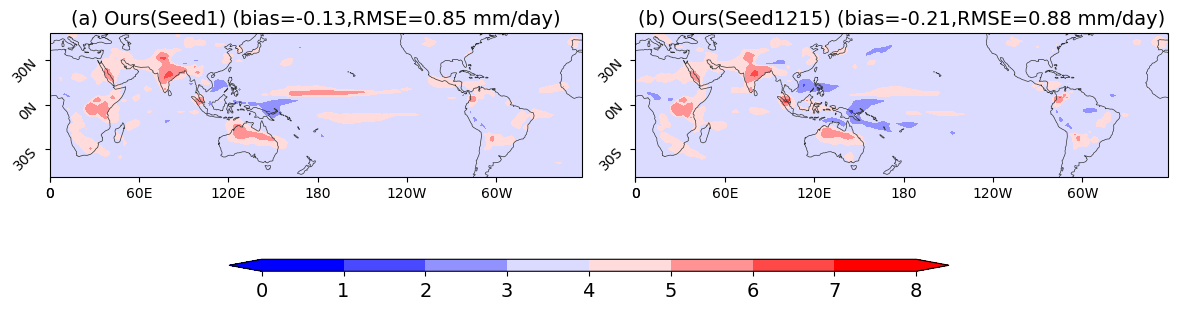

(8, 52, 144)


In [13]:
# 2(3) ANN precipiation bias

# Define the tick values and corresponding boundaries
# tick_values = [0,0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17]
tick_values = np.arange(-0,9,1)
boundaries = np.array(tick_values)

# Create a color map and normalization
cmap = cm.get_cmap('bwr', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)[22:74]
fig = plt.figure(figsize=(12, 3))
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0], projection=ccrs.PlateCarree(central_longitude=180))
ax2 = plt.subplot(gs[1], projection=ccrs.PlateCarree(central_longitude=180))
# ax4 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax5 = plt.subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax6 = plt.subplot(gs[2, 1], projection=ccrs.PlateCarree(central_longitude=180))
cbar_ax = fig.add_axes([0.2, -0.05, 0.6, 0.04])
# cax = plt.subplot(gs[2,:])  # This is where the colorbar will be

# Display the data with imshow using the custom colormap and normalization
# ax[0,0].contourf(jja_precip[0,::-1], cmap=cmap, norm=norm)
# color_interval = np.linspace(0, 19, 21)
color_interval = np.linspace(-8, 9, 21)
# plot_single_precip(ax1, ann_precip[0], color_interval, cmap=cmap)
# ax1.set_title(f"TRMM ANN mean {np.mean(ann_precip[0]):.2f} mm/day", font=font)
def plot_helper(ax, idx, target_idx, label):
    plot_single_precip(ax, ann_precip[idx]-ann_precip[target_idx], color_interval, cmap=cmap)
    title = f"({label}) {cases[idx]} (bias={np.mean(ann_precip[idx]-ann_precip[target_idx]):.2f},\
RMSE={rmse_weighted(ann_precip[idx], ann_precip[target_idx]):.2f} mm/day)"
    ax.set_title(title, fontsize=14)
plot_helper(ax1, 6, 1, 'a')
plot_helper(ax2, 7, 1, 'b')
# plot_helper(ax3, 2, 1, 'c')
# plot_helper(ax4, 5, 1, 'd')
# plot_helper(ax6, 6, 1)
# plot_helper(ax7, 3, 1)
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")
# cbar.set_label("Precipiation mm/day")

# Set the tick positions and labels on the color bar
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, fontsize=14)

# plt.tight_layout()
plt.tight_layout(rect=[0, 0.01, 1, 1])
plt.subplots_adjust(hspace=0.4, wspace=0.1)
# Display the plot
plt.show()
print(ann_precip.shape)

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_1837/3683237880.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('bwr', len(tick_values)-1)
/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_1837/3683237880.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.01, 1, 1])


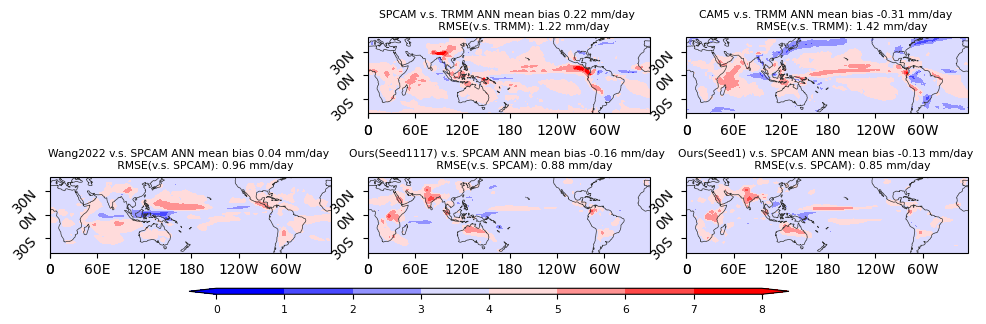

In [14]:
# 2(3) ANN precipiation bias

# Define the tick values and corresponding boundaries
# tick_values = [0,0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17]
tick_values = np.arange(-0,9,1)
boundaries = np.array(tick_values)

# Create a color map and normalization
cmap = cm.get_cmap('bwr', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)[22:74]
fig = plt.figure(figsize=(10, 3))
gs = gridspec.GridSpec(2, 3)
# ax1 = plt.subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax2 = plt.subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax3 = plt.subplot(gs[0, 2], projection=ccrs.PlateCarree(central_longitude=180))
ax4 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax5 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax6 = plt.subplot(gs[1, 2], projection=ccrs.PlateCarree(central_longitude=180))
cbar_ax = fig.add_axes([0.2, 0, 0.6, 0.02])
# cax = plt.subplot(gs[2,:])  # This is where the colorbar will be

# Display the data with imshow using the custom colormap and normalization
# ax[0,0].contourf(jja_precip[0,::-1], cmap=cmap, norm=norm)
# color_interval = np.linspace(0, 19, 21)
color_interval = np.linspace(-8, 9, 21)
# plot_single_precip(ax1, ann_precip[0], color_interval, cmap=cmap)
# ax1.set_title(f"TRMM ANN mean {np.mean(ann_precip[0]):.2f} mm/day", font=font)
def plot_helper(ax, idx, target_idx):
    plot_single_precip(ax, ann_precip[idx]-ann_precip[target_idx], color_interval, cmap=cmap)
    ax.set_title(f"{cases[idx]} v.s. {cases[target_idx]} ANN mean bias {np.mean(ann_precip[idx]-ann_precip[target_idx]):.2f} mm/day \n \
        RMSE(v.s. {cases[target_idx]}): {rmse_weighted(ann_precip[idx], ann_precip[target_idx]):.2f} mm/day", font=font)
plot_helper(ax2, 1, 0)
plot_helper(ax3, 4, 0)
plot_helper(ax4, 2, 1)
plot_helper(ax5, 5, 1)
plot_helper(ax6, 6, 1)
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")
# cbar.set_label("Precipiation mm/day")

# Set the tick positions and labels on the color bar
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, font=font)

# plt.tight_layout()
plt.tight_layout(rect=[0, 0.01, 1, 1])
plt.subplots_adjust(hspace=0.3, wspace=0.13)
# Display the plot
plt.show()

In [17]:
# 3(1). ANN t2m data prep
jja_t2m = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/era5/JJA_t2m.npy")
djf_t2m = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/era5/DJF_t2m.npy")
ann_t2m = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/era5/ANN_t2m.npy")
cases = ["ERA5", "SPCAM", "Wang2022", "NNCAM(PhyC)", "CAM5", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]

is_nan_mask = np.isnan(jja_t2m[0])
jja_t2m[:,is_nan_mask] = 0
is_nan_mask = np.isnan(ann_t2m[0])
ann_t2m[:,is_nan_mask] = 0

jlon = np.linspace(0,357.5,144)
jlat = np.linspace(-90,90,96)
# Compute the area of each grid cell
area_grid = np.zeros((len(jlat), len(jlon)))

lat_radian = jlat * np.pi / 180

for i, phi in enumerate(lat_radian):
    area = np.cos(phi) 
    area_grid[i, :] = area
# Normalize to get the horizontal mass factor
horizontal_mass_factors = area_grid / np.sum(area_grid)
print("lat weight: ", np.sum(horizontal_mass_factors))
def rmse_weighted_t(predictions, targets):
  diff = (predictions - targets)
  # print(diff.shape)
  diff_sq = diff ** 2
  # print(diff_sq.shape)
  diff_sq_weighted = diff_sq * horizontal_mass_factors
  return np.sqrt(np.sum(diff_sq_weighted))

def mean_weighted_t(predictions, horizontal_mass_factors):
  return np.sum((predictions) * horizontal_mass_factors)
  # return np.sqrt((((predictions - targets) ** 2) * horizontal_mass_factors).mean())

def plot_single_t2m(ax, precip, color_interval, cmap):#:subtitle):
    
    jlon = np.linspace(0,357.5,144)
    jlat = np.linspace(-90,90,96)
    prj = ccrs.PlateCarree()
    # Add longitude and latitude ticks
    ax.set_xticks(np.arange(0, 361, 60), crs=prj)  # Longitude ticks
    ax.set_yticks(np.arange(-90, 91, 30), crs=prj)  # Latitude ticks
    
    # Label ticks with degrees
    lon_labels = [str(lon) + 'E' if lon < 180 else str(360-lon) + 'W' for lon in np.arange(0, 361, 60)]
    lon_labels[lon_labels.index("180W")] = "180"
    lon_labels[lon_labels.index("0W")] = "0"
    lon_labels[lon_labels.index("0E")] = "0"
    lat_labels = [str(lat) + 'N' if lat >= 0 else str(abs(lat)) + 'S' for lat in np.arange(-90, 91, 30)]
    
    ax.set_xticklabels(lon_labels, fontsize=14)
    ax.set_yticklabels(lat_labels, fontsize=14)

    # axs = fig.add_subplot(gs[i, j], projection = ccrs.PlateCarree(central_longitude=180))
  # axs = fig.add_subplot(projection = ccrs.Robinson(central_longitude=180)) 
    ax.add_feature(cfeat.COASTLINE, edgecolor = '#333333', linewidth=0.5)
  # cs0 = axs.contourf(jlon, jlat, precip, np.linspace(plotrange[0], plotrange[1], 21), cmap =plt.cm.coolwarm, extend='both', transform = prj)
    #cs0 = axs.contourf(jlon, jlat, precip, color_interval, cmap =plt.cm.coolwarm, extend='both', transform = prj)
    cs0 = ax.contourf(jlon, jlat, precip, color_interval, cmap =cmap, extend='both', transform = prj)
    ax.tick_params(labelsize = 14)

lat weight:  1.0000000000000002


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_1837/4145140509.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('bwr', len(tick_values)-1)
/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_1837/4145140509.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])


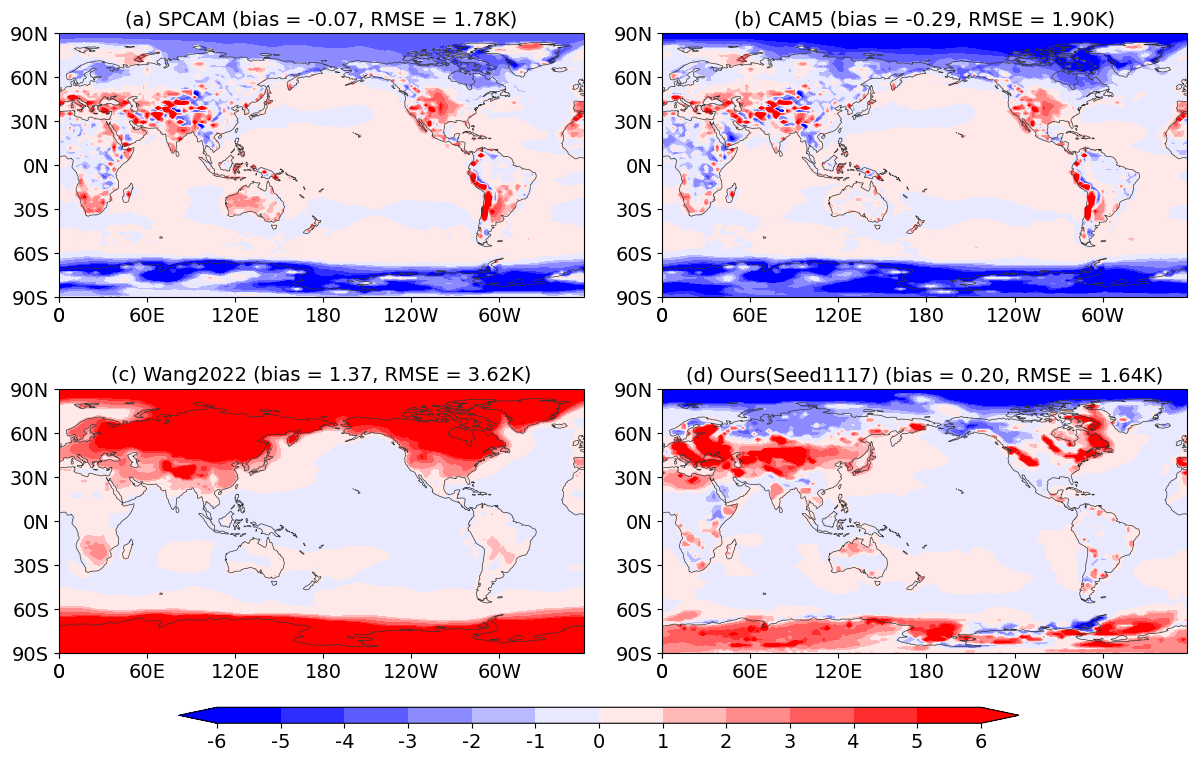

In [18]:
# 3(4) ANN t2m distribution just bias
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax2 = plt.subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax3 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax4 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))

color_interval = np.linspace(-6, 6, 21)
tick_values = np.arange(-6, 7, 1)
boundaries = np.array(tick_values)
cmap = cm.get_cmap('bwr', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

def plot_helper_diff(ax, idx, target_idx, label):
    plot_single_t2m(ax, ann_t2m[idx]-ann_t2m[target_idx], color_interval, cmap=cmap)
    ax.set_title(f"({label}) {cases[idx]} (bias = {mean_weighted_t(ann_t2m[idx]-ann_t2m[target_idx], horizontal_mass_factors):.2f}, RMSE = {rmse_weighted_t(ann_t2m[idx], ann_t2m[target_idx]):.2f}K)", fontsize=14)

plot_helper_diff(ax1, 1, 0, 'a')
plot_helper_diff(ax2, 4, 0, 'b')
plot_helper_diff(ax3, 2, 1, 'c')
plot_helper_diff(ax4, 5, 1, 'd')

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, font=font, fontsize=14)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.subplots_adjust(left=0.05, right=0.99, top=0.95, bottom=0.1, hspace=0.1, wspace=0.15)
plt.show()

In [34]:
# 6(1). zonal mean data prep
Q_zonal = np.load(DATA_PATH+"/zonal/Q_zonal_mean.npy")[:,:4*12].mean(axis=1)*1000
T_zonal = np.load(DATA_PATH+"/zonal/T_zonal_mean.npy")[:,:4*12].mean(axis=1)
print(T_zonal.shape)
thickness = np.load(DATA_PATH+"/thickness.npy")
print("thickness shape:", thickness.shape)
thickness = thickness.mean(axis=0).mean(axis=2)
print("thickness shape:", thickness.shape)

lev = np.array([  3.64346569,   7.59481965,  14.35663225,  24.61222   ,
                    38.26829977,  54.59547974,  72.01245055,  87.82123029,
                   103.31712663, 121.54724076, 142.99403876, 168.22507977,
                   197.9080867 , 232.82861896, 273.91081676, 322.24190235,
                   379.10090387, 445.9925741 , 524.68717471, 609.77869481,
                   691.38943031, 763.40448111, 820.85836865, 859.53476653,
                   887.02024892, 912.64454694, 936.19839847, 957.48547954,
                   976.32540739, 992.55609512])
cases = ["ERA5", "SPCAM", "CAM5", "Wang2022", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]
jlon = np.linspace(0,357.5,144)
jlat = np.linspace(-90,90,96)
# Compute the area of each grid cell
area_grid = np.zeros((len(lev), len(jlat)))

lat_radian = jlat * np.pi / 180

for i, phi in enumerate(lat_radian):
    area = np.cos(phi) 
    area_grid[:, i] = area
area_grid *= thickness
# Normalize to get the horizontal mass factor
mass_factors = area_grid / np.sum(area_grid)
print("lat weight: ", np.sum(mass_factors))
def rmse_weighted_zonal(predictions, targets):
  diff = (predictions - targets)
  # print(diff.shape)
  diff_sq = diff ** 2
  # print(diff_sq.shape)
  diff_sq_weighted = diff_sq * mass_factors
  return np.sqrt(np.sum(diff_sq_weighted))
  # return np.sqrt((((predictions - targets) ** 2) * horizontal_mass_factors).mean())


(7, 30, 96)
thickness shape: (72, 30, 96, 144)
thickness shape: (30, 96)
lat weight:  1.0


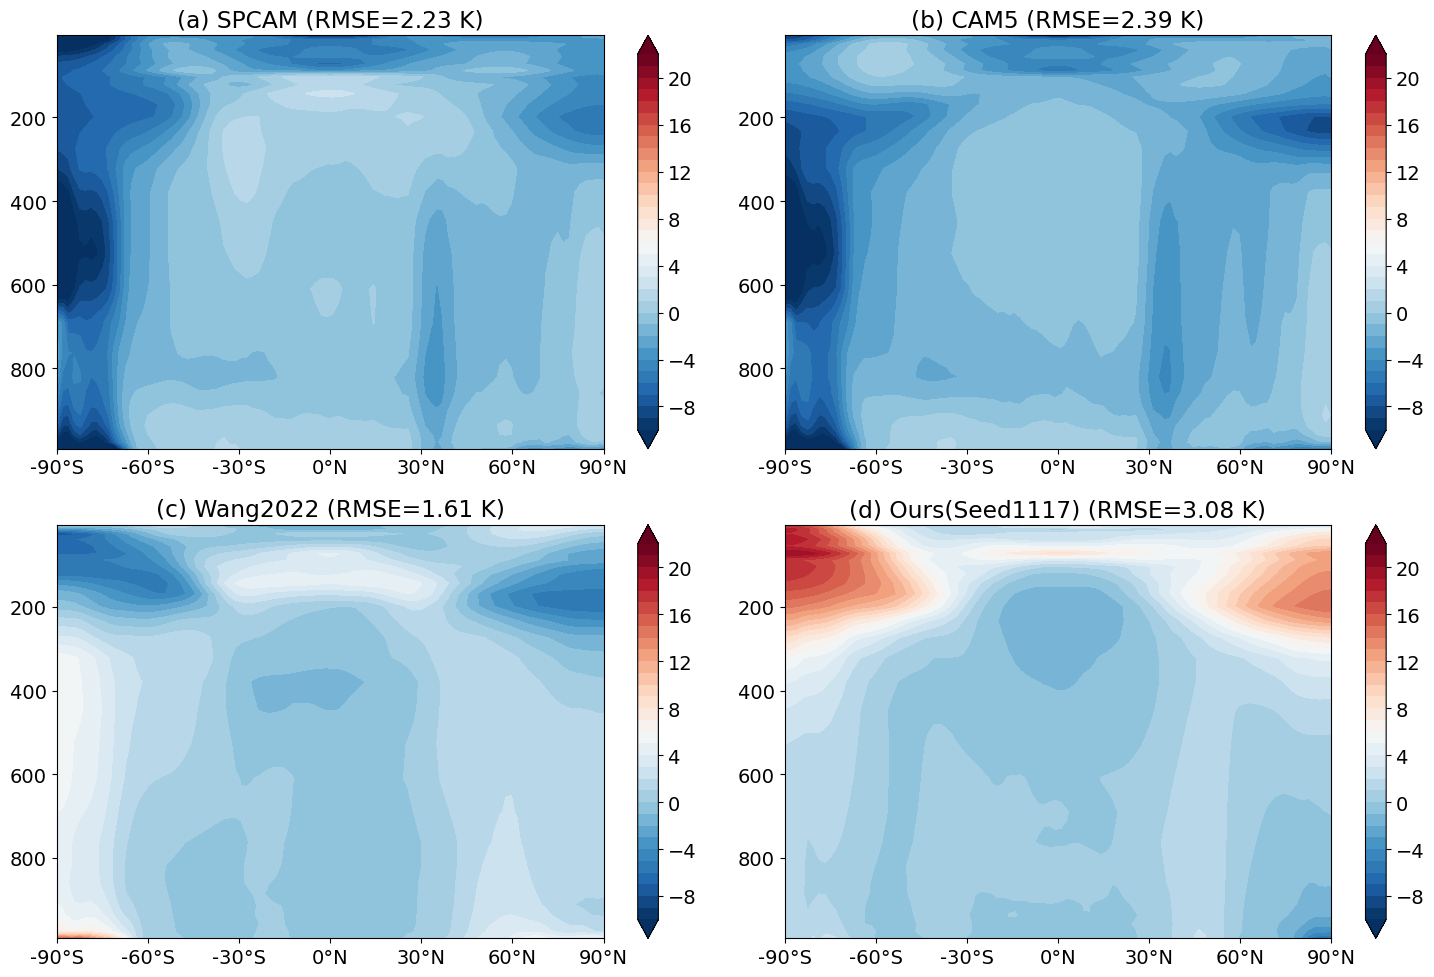

In [51]:
# 6(3). zonal mean T bias
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
def plot_helper(i, j, idx, target_idx, sub_label):
    axes[i,j].set_title(f"({sub_label}) {cases[idx]} (RMSE={rmse_weighted_zonal(T_zonal[idx], T_zonal[target_idx]):.2f} K)")
    contour = axes[i,j].contourf(np.linspace(-90,90,96), lev, (T_zonal[idx] - T_zonal[target_idx]),np.arange(-10,23,1),cmap="RdBu_r", extend="both")
    axes[i,j].set_xticks(np.arange(-90, 91, 30), [f"{lat}°{'S' if lat < 0 else 'N'}" for lat in range(-90, 91, 30)])
    axes[i,j].invert_yaxis()
    fig.colorbar(contour, ax=axes[i,j])
    # 6. zonal mean T distribution
# plot data with shape (30, 96), giving x ticks being lev, y ticks being np.arange(-90,90,96)
# axes[0,0].axis("off")
plot_helper(0,0,1,0,'a')
plot_helper(0,1,2,0,'b')
plot_helper(1,0,3,1,'c')
plot_helper(1,1,4,1,'d')
plt.tight_layout()

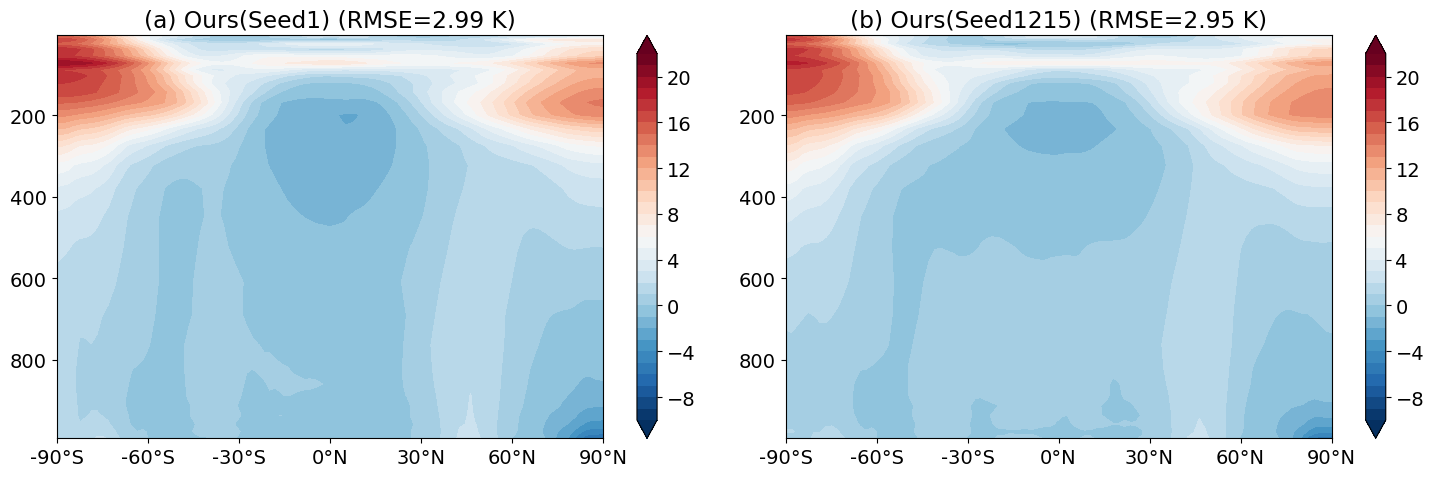

In [55]:
# 6(3). zonal mean T bias
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
def plot_helper(i, j, idx, target_idx, sub_label):
    axes[j].set_title(f"({sub_label}) {cases[idx]} (RMSE={rmse_weighted_zonal(T_zonal[idx], T_zonal[target_idx]):.2f} K)")
    contour = axes[j].contourf(np.linspace(-90,90,96), lev, (T_zonal[idx] - T_zonal[target_idx]),np.arange(-10,23,1),cmap="RdBu_r", extend="both")
    axes[j].set_xticks(np.arange(-90, 91, 30), [f"{lat}°{'S' if lat < 0 else 'N'}" for lat in range(-90, 91, 30)])
    axes[j].invert_yaxis()
    fig.colorbar(contour, ax=axes[j])
    # 6. zonal mean T distribution
# plot data with shape (30, 96), giving x ticks being lev, y ticks being np.arange(-90,90,96)
# axes[0,0].axis("off")
plot_helper(0,0,5,1,'a')
plot_helper(0,1,6,1,'b')
# plot_helper(1,0,3,1)
# plot_helper(1,1,5,1)
plt.tight_layout()

In [32]:
T_zonal.shape

(7, 30, 96)

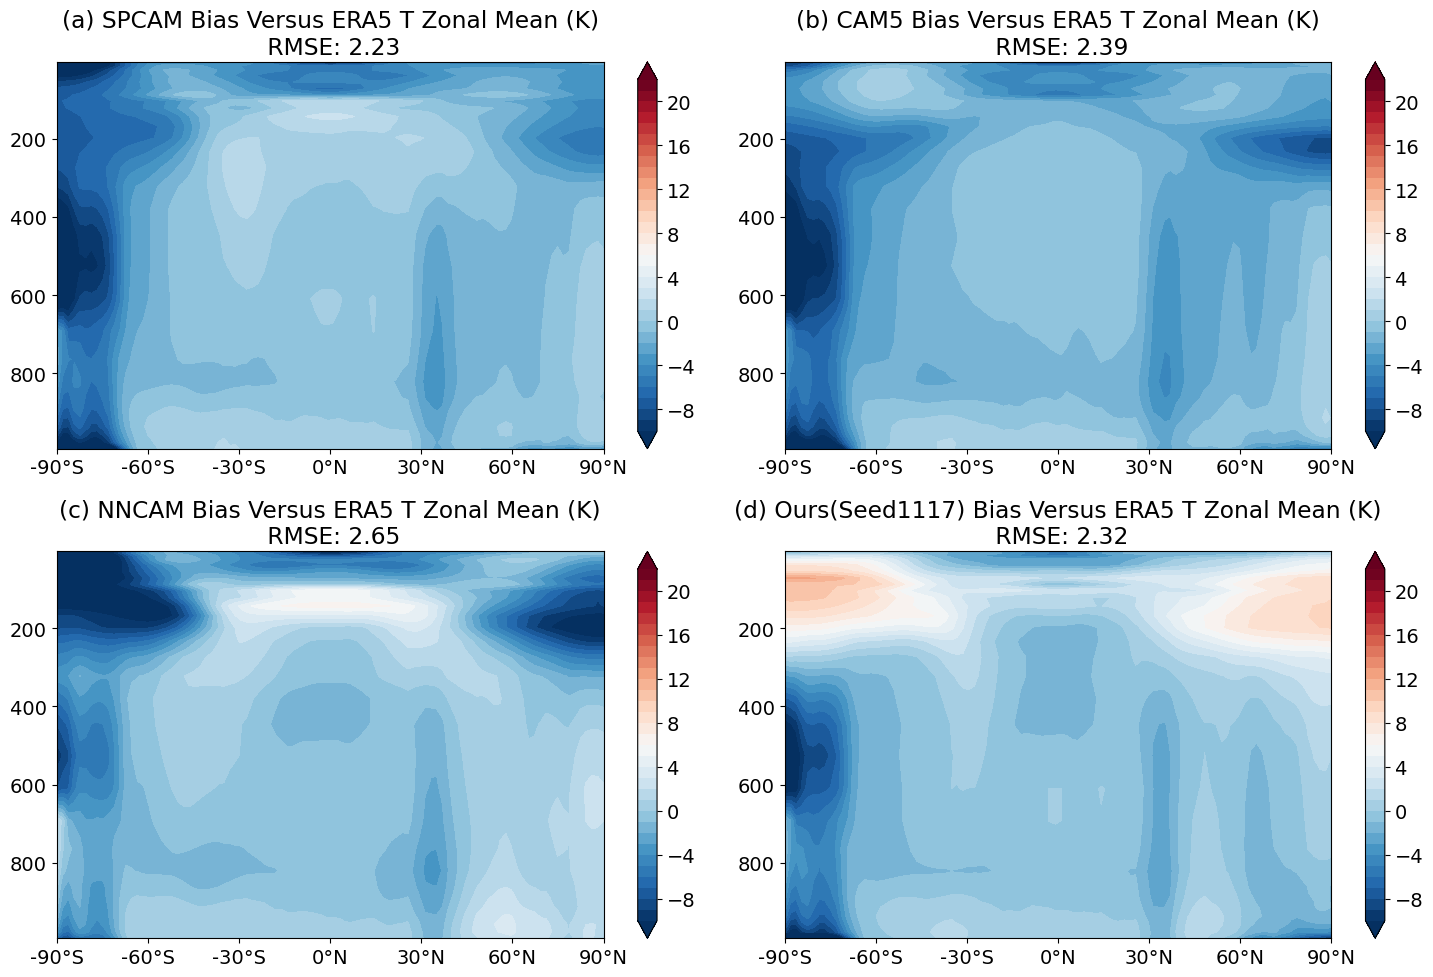

In [215]:
# 6(4). zonal mean T bias all model versus ERA5
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
def plot_helper(i, j, idx, target_idx, label):
    axes[i,j].set_title(f"({label}) {cases[idx]} Bias Versus {cases[target_idx]} T Zonal Mean (K)\n RMSE: {rmse_weighted_zonal(T_zonal[idx], T_zonal[target_idx]):.2f}")
    contour = axes[i,j].contourf(np.linspace(-90,90,96), lev, (T_zonal[idx] - T_zonal[target_idx]),np.arange(-10,23,1),cmap="RdBu_r", extend="both")
    axes[i,j].set_xticks(np.arange(-90, 91, 30), [f"{lat}°{'S' if lat < 0 else 'N'}" for lat in range(-90, 91, 30)])
    axes[i,j].invert_yaxis()
    fig.colorbar(contour, ax=axes[i,j])
plot_helper(0,0,1,0,'a')
plot_helper(0,1,2,0,'b')
plot_helper(1,0,3,0,'c')
plot_helper(1,1,5,0,'d')
plt.tight_layout()

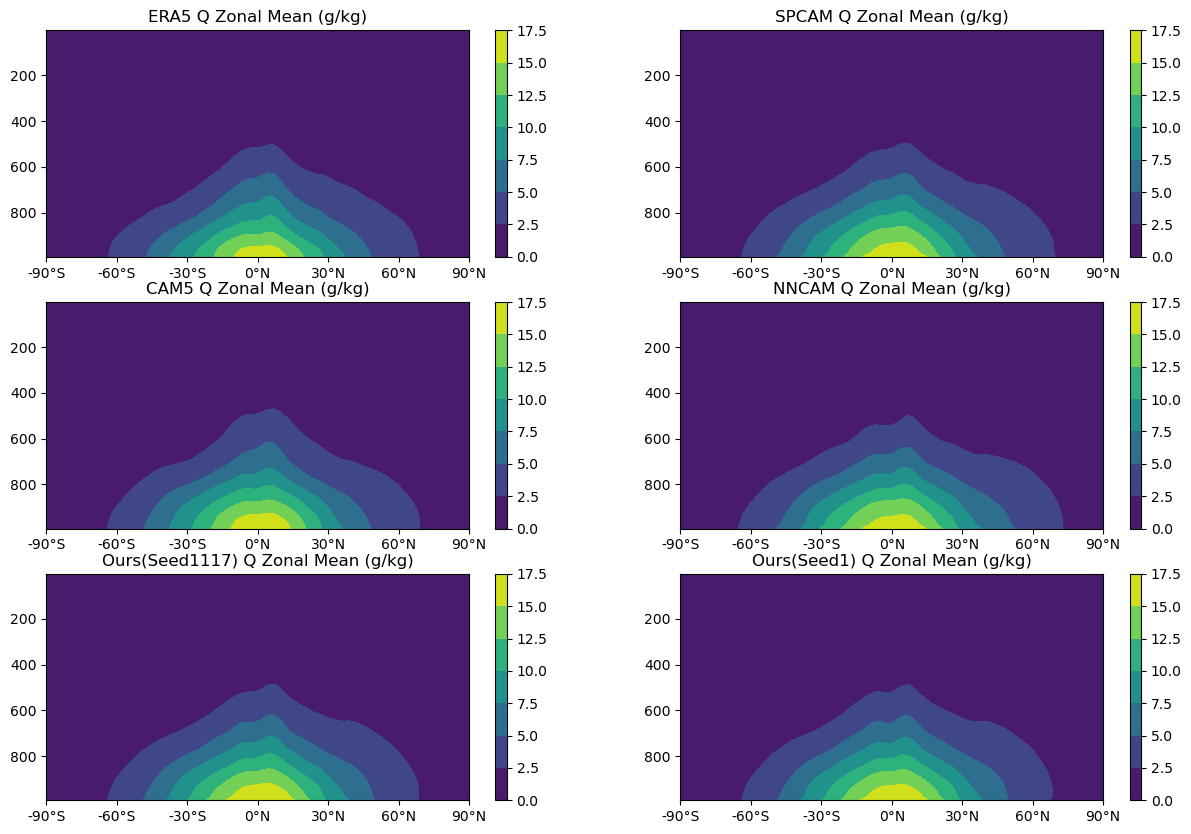

In [189]:
# 7(1). zonal mean Q distribution
# plot data with shape (30, 96), giving x ticks being lev, y ticks being np.arange(-90,90,96)
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
# axes[0,0].set_title("SPCAM T Zonal Mean(K)")
# contour = axes[0,0].contourf(np.linspace(-90,90,96), lev, (T_zonal[0]).mean(axis=0))
# axes[0,0].set_xticks(np.arange(-90, 91, 30), [f"{lat}°{'S' if lat < 0 else 'N'}" for lat in range(-90, 91, 30)])
# axes[0,0].invert_yaxis()
# fig.colorbar(contour, ax=axes[0,0])
# for i in range(3):
#     for j in range(2):
#         target_exp = i*2+j
def plot_helper(i, j, idx):
    axes[i,j].set_title(f"{cases[idx]} Q Zonal Mean (g/kg)")
    contour = axes[i,j].contourf(np.linspace(-90,90,96), lev, Q_zonal[idx])
    axes[i,j].set_xticks(np.arange(-90, 91, 30), [f"{lat}°{'S' if lat < 0 else 'N'}" for lat in range(-90, 91, 30)])
    axes[i,j].invert_yaxis()
    fig.colorbar(contour, ax=axes[i,j])
plot_helper(0,0,0)
plot_helper(0,1,1)
plot_helper(1,0,2)
plot_helper(1,1,3)
plot_helper(2,0,5)
plot_helper(2,1,6)

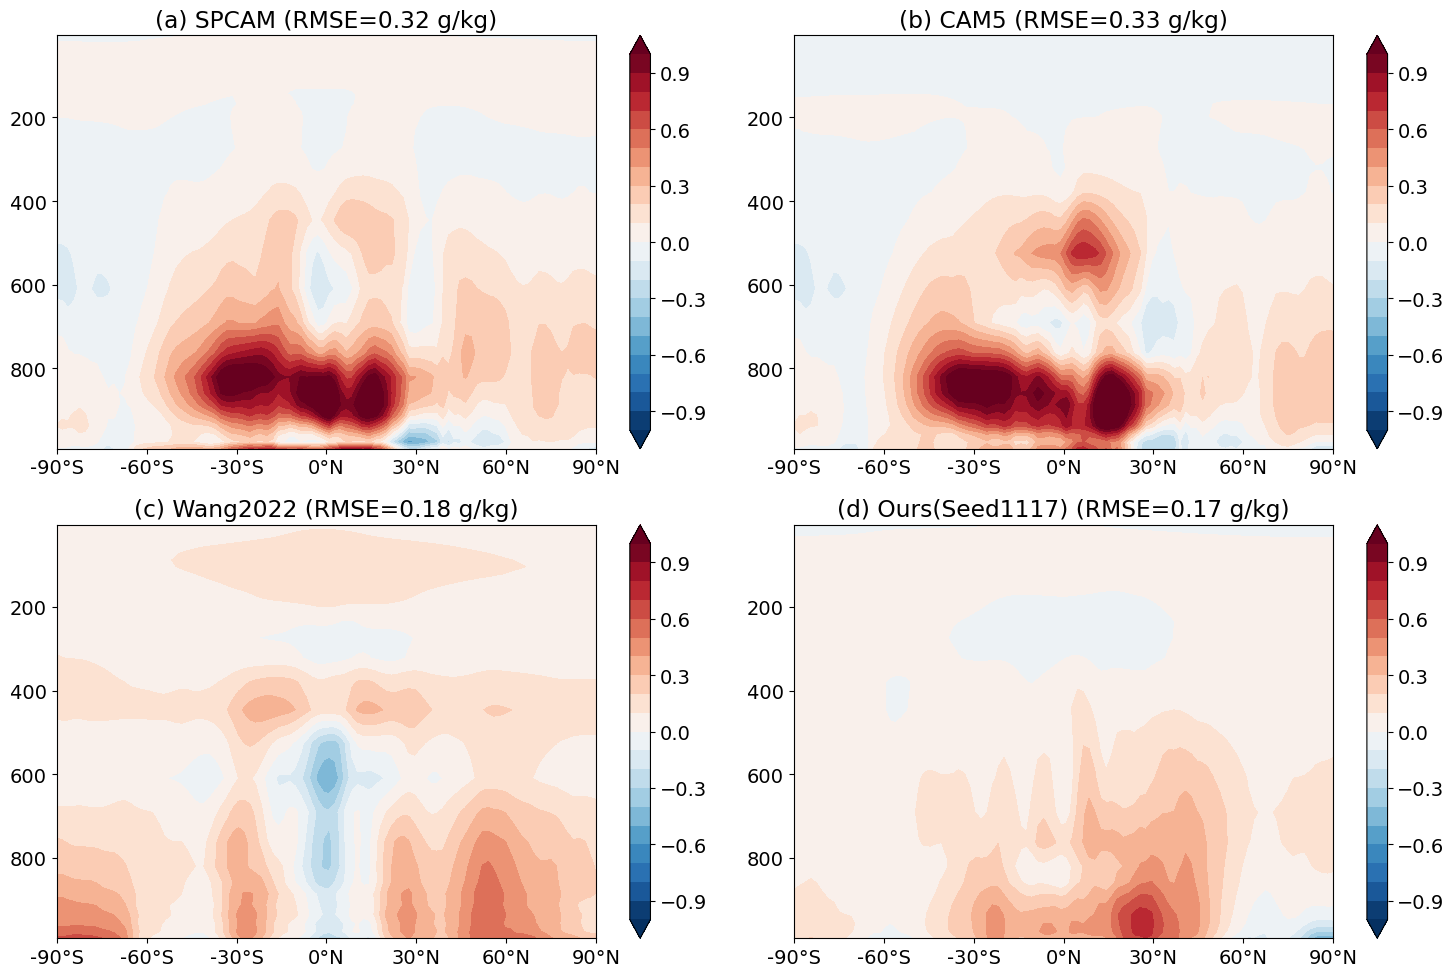

In [52]:
# 7(2). zonal mean Q bias
# 6(4). zonal mean T bias all model versus ERA5
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
def plot_helper(i, j, idx, target_idx, label):
    axes[i,j].set_title(f"({label}) {cases[idx]} (RMSE={rmse_weighted_zonal(Q_zonal[idx], Q_zonal[target_idx]):.2f} g/kg)")
    contour = axes[i,j].contourf(np.linspace(-90,90,96), lev, (Q_zonal[idx] - Q_zonal[target_idx]),np.arange(-1,1.1,0.1),cmap="RdBu_r", extend="both")
    axes[i,j].set_xticks(np.arange(-90, 91, 30), [f"{lat}°{'S' if lat < 0 else 'N'}" for lat in range(-90, 91, 30)])
    axes[i,j].invert_yaxis()
    fig.colorbar(contour, ax=axes[i,j])
plot_helper(0,0,1,0,'a')
plot_helper(0,1,2,0,'b')
plot_helper(1,0,3,1,'c')
plot_helper(1,1,4,1,'d')
plt.tight_layout()

(7, 30, 96)


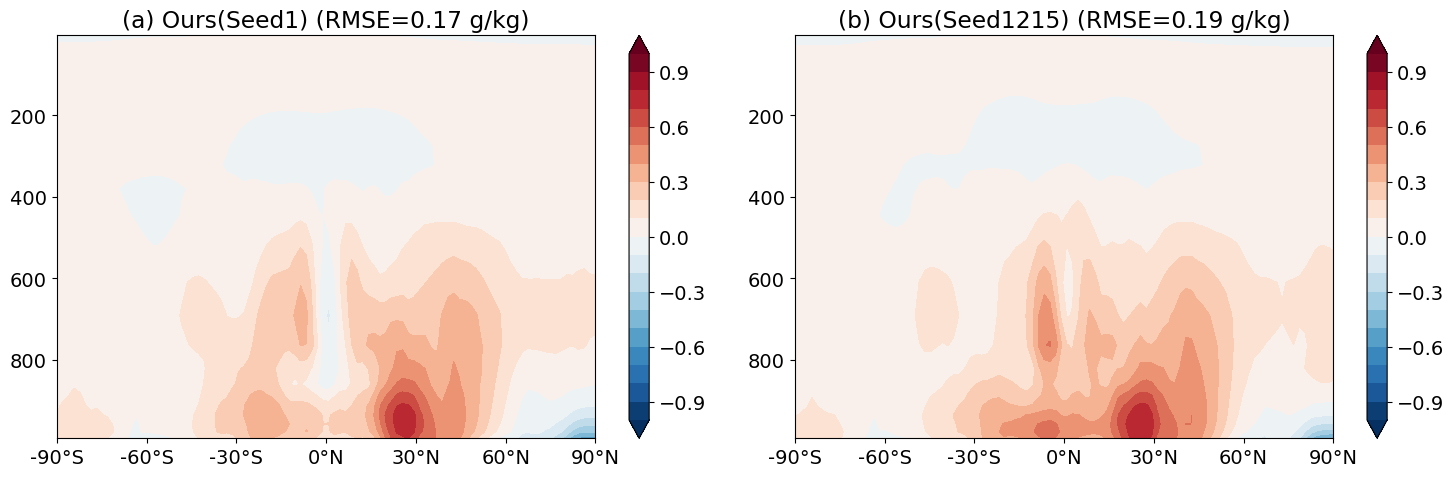

In [53]:
# 7(2). zonal mean Q bias
# 6(4). zonal mean T bias all model versus ERA5
print(Q_zonal.shape)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
def plot_helper(i, j, idx, target_idx, label):
    axes[j].set_title(f"({label}) {cases[idx]} (RMSE={rmse_weighted_zonal(Q_zonal[idx], Q_zonal[target_idx]):.2f} g/kg)")
    contour = axes[j].contourf(np.linspace(-90,90,96), lev, (Q_zonal[idx] - Q_zonal[target_idx]),np.arange(-1,1.1,0.1),cmap="RdBu_r", extend="both")
    axes[j].set_xticks(np.arange(-90, 91, 30), [f"{lat}°{'S' if lat < 0 else 'N'}" for lat in range(-90, 91, 30)])
    axes[j].invert_yaxis()
    fig.colorbar(contour, ax=axes[j])
plot_helper(0,0,5,1,'a')
plot_helper(0,1,6,1,'b')
# plot_helper(1,0,3,1,'c')
# plot_helper(1,1,5,1,'d')
plt.tight_layout()

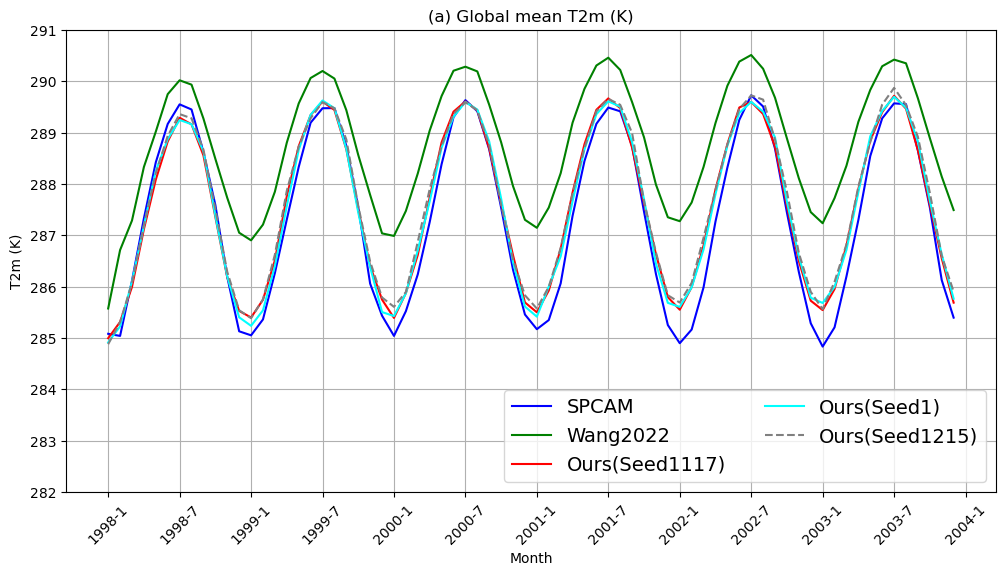

In [6]:
t_mrmse = np.load("/Users/jianda/Projects/PaperWriting/replaybuffer/plot_data/monthly_mean_weighted/TREFHT_monthly_mean.npy")
fig,ax = plt.subplots(figsize=(12,6))
casenames = ["ERA5", "SPCAM", "CAM5", "Wang2022", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]
plt.title("(a) Global mean T2m (K)")
plt.xlabel("Month")
plt.grid(True)
plt.rcParams.update({'font.size': 14})

# plt.ylim(273, 285)
colors = ["orange", "blue", "purple", "green"]
# for i in range(7):
    #ax.plot(t_mrmse[i, :], label=casenames[i], color=colors[i])
    # ax.plot(t_mrmse[i, :], label=casenames[i])
# ax.plot(t_mrmse[0, :], label=casenames[0], color=colors[0])
ax.plot(t_mrmse[1, :], label=casenames[1], color=colors[1])
# ax.plot(t_mrmse[2, :], label=casenames[2], color=colors[2])
ax.plot(t_mrmse[3, :], label=casenames[3], color=colors[3])
ax.plot(t_mrmse[4, :], label=casenames[4], color=our_colors[1117])
ax.plot(t_mrmse[5, :], label=casenames[5], color=our_colors[1])
ax.plot(t_mrmse[6, :], label=casenames[6], color=our_colors[1215], linestyle="--")
ax.set_ylim(282, 291)
ax.set_ylabel("T2m (K)")
plt.xticks(np.arange(0, 78, 6), [f"{1998 + i//12}-{1 + i%12}" for i in range(0, 78, 6)], rotation=45)
plt.legend(ncol=2, loc='lower right')

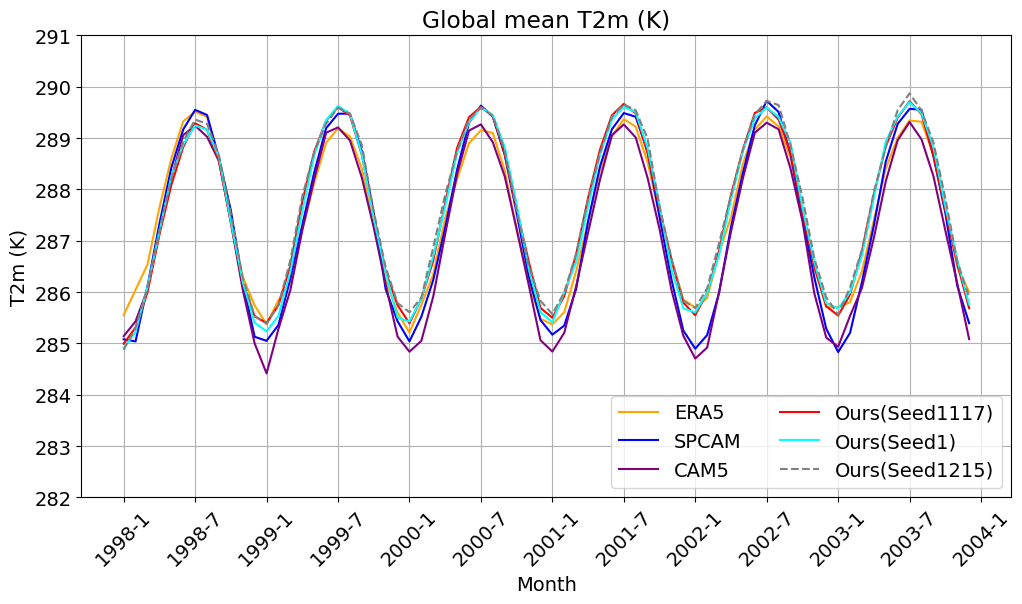

In [11]:
t_mrmse = np.load("/Users/jianda/Projects/PaperWriting/replaybuffer/plot_data/monthly_mean_weighted/TREFHT_monthly_mean.npy")
fig,ax = plt.subplots(figsize=(12,6))
casenames = ["ERA5", "SPCAM", "CAM5", "Wang2022", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]
plt.title("Global mean T2m (K)")
plt.xlabel("Month")
plt.grid(True)
plt.rcParams.update({'font.size': 14})

# plt.ylim(273, 285)
colors = ["orange", "blue", "purple", "green"]
# for i in range(7):
    #ax.plot(t_mrmse[i, :], label=casenames[i], color=colors[i])
    # ax.plot(t_mrmse[i, :], label=casenames[i])
ax.plot(t_mrmse[0, :], label=casenames[0], color=colors[0])
ax.plot(t_mrmse[1, :], label=casenames[1], color=colors[1])
ax.plot(t_mrmse[2, :], label=casenames[2], color=colors[2])
# ax.plot(t_mrmse[3, :], label=casenames[3], color=colors[3])
ax.plot(t_mrmse[4, :], label=casenames[4], color=our_colors[1117])
ax.plot(t_mrmse[5, :], label=casenames[5], color=our_colors[1])
ax.plot(t_mrmse[6, :], label=casenames[6], color=our_colors[1215], linestyle="--")
ax.set_ylim(282, 291)
ax.set_ylabel("T2m (K)")
plt.xticks(np.arange(0, 78, 6), [f"{1998 + i//12}-{1 + i%12}" for i in range(0, 78, 6)], rotation=45)
plt.legend(ncol=2, loc='lower right')

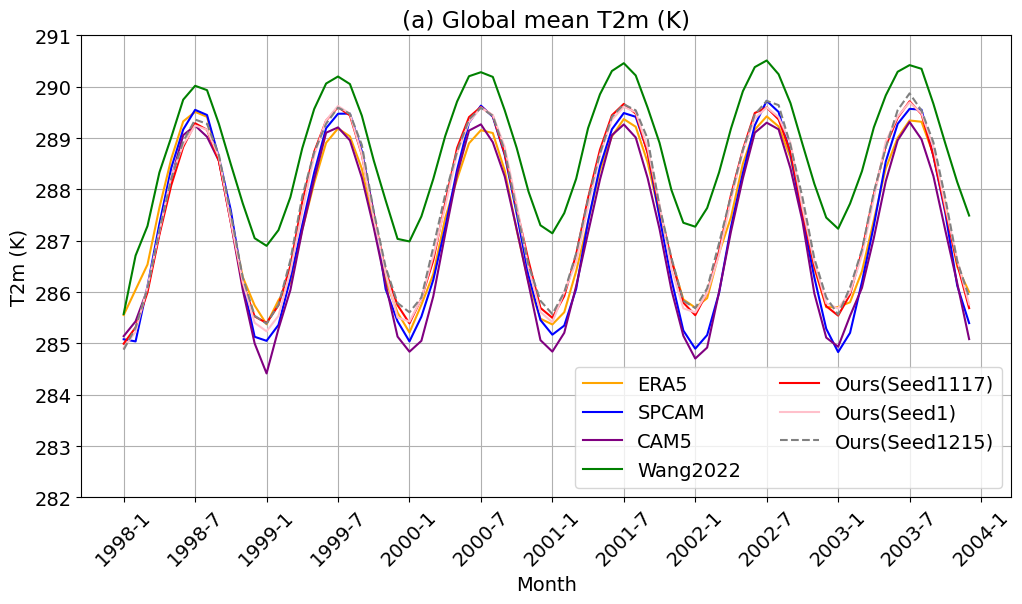

In [ ]:
t_mrmse = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/monthly_mean_weighted/TREFHT_monthly_mean.npy")
fig,ax = plt.subplots(figsize=(12,6))
casenames = ["ERA5", "SPCAM", "CAM5", "Wang2022", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]
plt.title("(a) Global mean T2m (K)")
plt.xlabel("Month")
plt.grid(True)
plt.rcParams.update({'font.size': 14})

# plt.ylim(273, 285)
colors = ["orange", "blue", "purple", "green"]
# for i in range(7):
    #ax.plot(t_mrmse[i, :], label=casenames[i], color=colors[i])
    # ax.plot(t_mrmse[i, :], label=casenames[i])
ax.plot(t_mrmse[0, :], label=casenames[0], color=colors[0])
ax.plot(t_mrmse[1, :], label=casenames[1], color=colors[1])
ax.plot(t_mrmse[2, :], label=casenames[2], color=colors[2])
ax.plot(t_mrmse[3, :], label=casenames[3], color=colors[3])
ax.plot(t_mrmse[4, :], label=casenames[4], color=our_colors[1117])
ax.plot(t_mrmse[5, :], label=casenames[5], color=our_colors[1])
ax.plot(t_mrmse[6, :], label=casenames[6], color=our_colors[1215], linestyle="--")
ax.set_ylim(282, 291)
ax.set_ylabel("T2m (K)")
plt.xticks(np.arange(0, 78, 6), [f"{1998 + i//12}-{1 + i%12}" for i in range(0, 78, 6)], rotation=45)
plt.legend(ncol=2, loc='lower right')

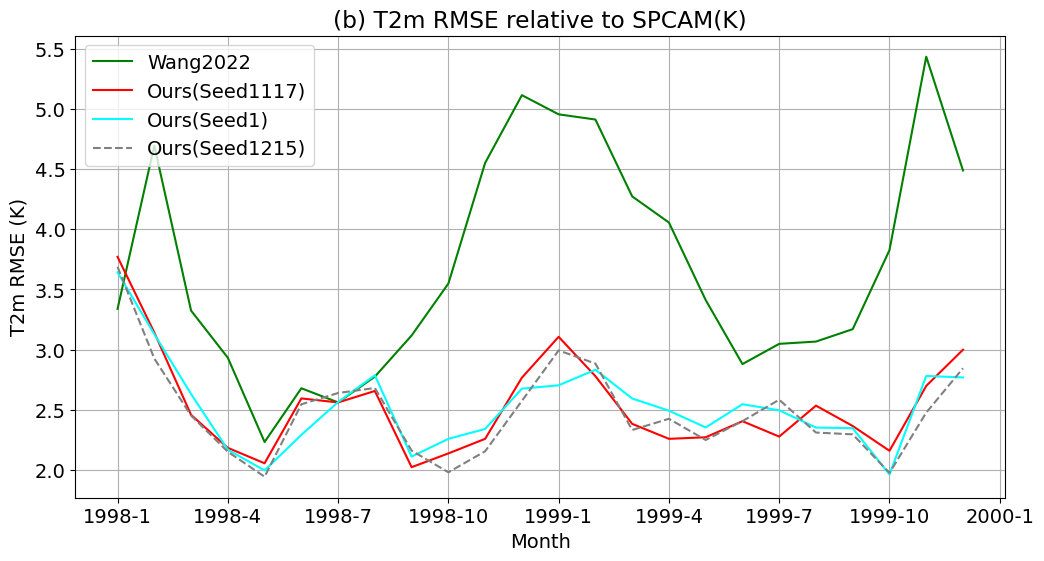

In [20]:
num_months = 24
colors = ["green", "orange", "purple"]
t_mrmse = np.load("/Users/jianda/Projects/PaperWriting/replaybuffer/plot_data/monthly_rmse_weighted/TREFHT_monthly_rmse.npy")
fig,ax = plt.subplots(figsize=(12,6))
casenames = ["CAM5", "Wang2022", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]
plt.title("(b) T2m RMSE relative to SPCAM(K)")
plt.xlabel("Month")
plt.grid(True)
# for i in [0,2]:
plt.rcParams.update({'font.size': 14})
# ax.plot(t_mrmse[0, :num_months], label=casenames[0], color=colors[0])
ax.plot(t_mrmse[1, :num_months], label=casenames[1], color="green")
ax.plot(t_mrmse[2, :num_months], label=casenames[2], color=our_colors[1117])
ax.plot(t_mrmse[3, :num_months], label=casenames[3], color=our_colors[1])
ax.plot(t_mrmse[4, :num_months], label=casenames[4], color=our_colors[1215], linestyle="--")
# ax.plot(t_mrmse[5, :num_months], label=casenames[5], marker='o', color="c")
ax.set_ylabel("T2m RMSE (K)")
plt.xticks(np.arange(0, 27, 3), [f"{1998 + i//12}-{1 + i%12}" for i in range(0, 27, 3)])
plt.legend(loc="upper left")

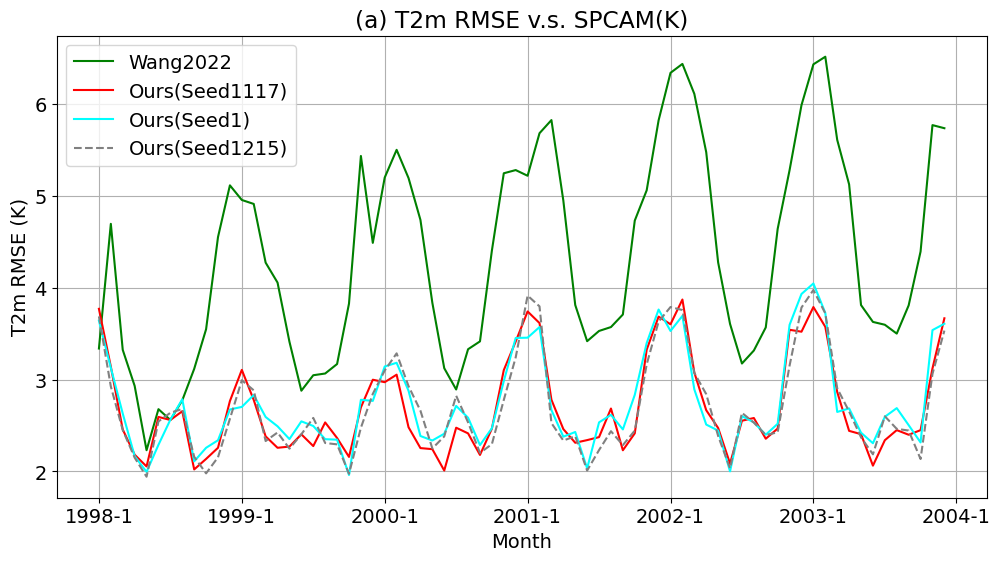

In [23]:
num_months = 72
colors = ["green", "orange", "purple"]
t_mrmse = np.load("/Users/jianda/Projects/PaperWriting/replaybuffer/plot_data/monthly_rmse_weighted/TREFHT_monthly_rmse.npy")
fig,ax = plt.subplots(figsize=(12,6))
casenames = ["CAM5", "Wang2022", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]
plt.title("(a) T2m RMSE v.s. SPCAM(K)")
plt.xlabel("Month")
plt.grid(True)
# for i in [0,2]:
plt.rcParams.update({'font.size': 14})
# ax.plot(t_mrmse[0, :num_months], label=casenames[0], color=colors[0])
ax.plot(t_mrmse[1, :num_months], label=casenames[1], color="green")
ax.plot(t_mrmse[2, :num_months], label=casenames[2], color=our_colors[1117])
ax.plot(t_mrmse[3, :num_months], label=casenames[3], color=our_colors[1])
ax.plot(t_mrmse[4, :num_months], label=casenames[4], color=our_colors[1215], linestyle="--")
# ax.plot(t_mrmse[5, :num_months], label=casenames[5], marker='o', color="c")
ax.set_ylabel("T2m RMSE (K)")
# plt.xticks(np.arange(0, 27, 3), [f"{1998 + i//12}-{1 + i%12}" for i in range(0, 27, 3)])
plt.xticks(np.arange(0, 84, 12), [f"{1998 + i//12}-{1 + i%12}" for i in range(0, 84, 12)])
plt.legend(loc="upper left")

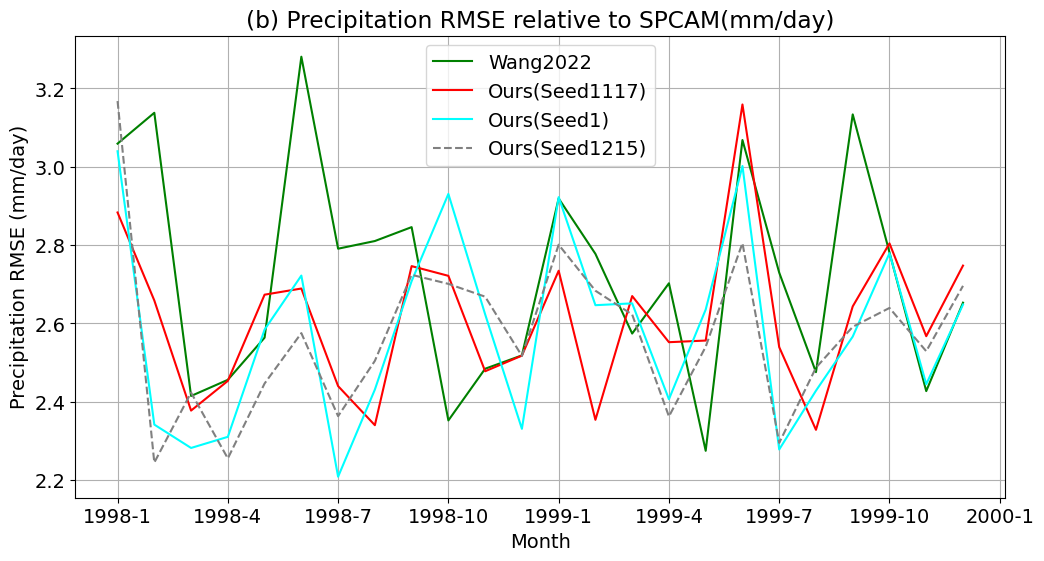

In [32]:
num_months = 24
colors = ["green", "orange", "purple"]
t_mrmse = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/monthly_rmse_weighted/PRECC_monthly_rmse.npy")
fig,ax = plt.subplots(figsize=(12,6))
casenames = ["CAM5", "Wang2022", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]
plt.title("(b) Precipitation RMSE relative to SPCAM(mm/day)")
plt.xlabel("Month")
plt.grid(True)
# for i in [0,2]:
plt.rcParams.update({'font.size': 14})
# ax.plot(t_mrmse[0, :num_months], label=casenames[0], color=colors[0])
ax.plot(t_mrmse[1, :num_months], label=casenames[1], color="green")
ax.plot(t_mrmse[2, :num_months], label=casenames[2], color=our_colors[1117])
ax.plot(t_mrmse[3, :num_months], label=casenames[3], color=our_colors[1])
ax.plot(t_mrmse[4, :num_months], label=casenames[4], color=our_colors[1215], linestyle="--")
# ax.plot(t_mrmse[5, :num_months], label=casenames[5], marker='o', color="c")
ax.set_ylabel("Precipitation RMSE (mm/day)")
plt.xticks(np.arange(0, 27, 3), [f"{1998 + i//12}-{1 + i%12}" for i in range(0, 27, 3)])
plt.legend(loc="upper center")

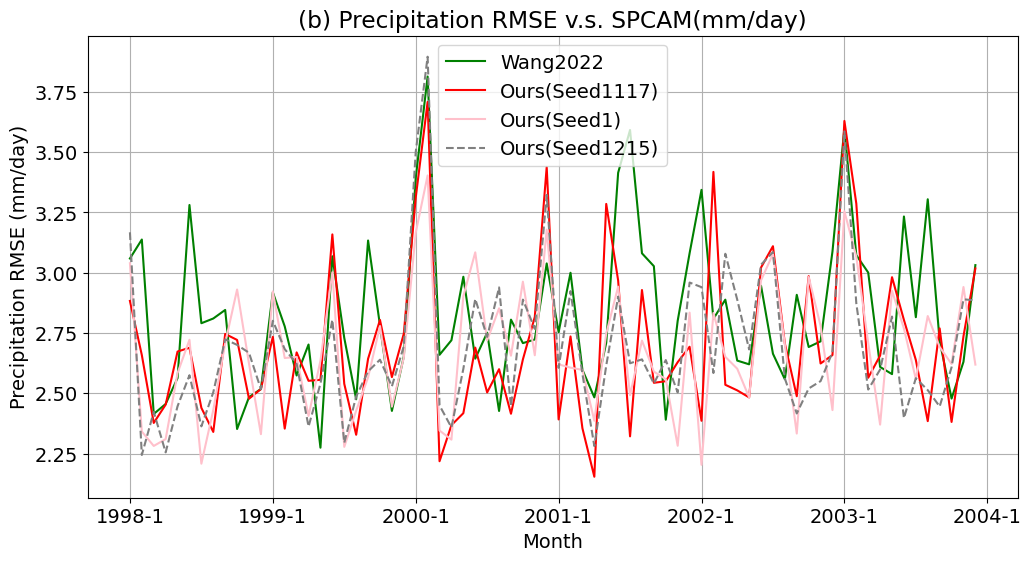

In [23]:
num_months = 72
colors = ["green", "orange", "purple"]
t_mrmse = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/monthly_rmse_weighted/PRECC_monthly_rmse.npy")
fig,ax = plt.subplots(figsize=(12,6))
casenames = ["CAM5", "Wang2022", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]
plt.title("(b) Precipitation RMSE v.s. SPCAM(mm/day)")
plt.xlabel("Month")
plt.grid(True)
# for i in [0,2]:
plt.rcParams.update({'font.size': 14})
# ax.plot(t_mrmse[0, :num_months], label=casenames[0], color=colors[0])
ax.plot(t_mrmse[1, :num_months], label=casenames[1], color="green")
ax.plot(t_mrmse[2, :num_months], label=casenames[2], color=our_colors[1117])
ax.plot(t_mrmse[3, :num_months], label=casenames[3], color=our_colors[1])
ax.plot(t_mrmse[4, :num_months], label=casenames[4], color=our_colors[1215], linestyle="--")
# ax.plot(t_mrmse[5, :num_months], label=casenames[5], marker='o', color="c")
ax.set_ylabel("Precipitation RMSE (mm/day)")
plt.xticks(np.arange(0, 84, 12), [f"{1998 + i//12}-{1 + i%12}" for i in range(0, 84, 12)])
plt.legend(loc="upper center")

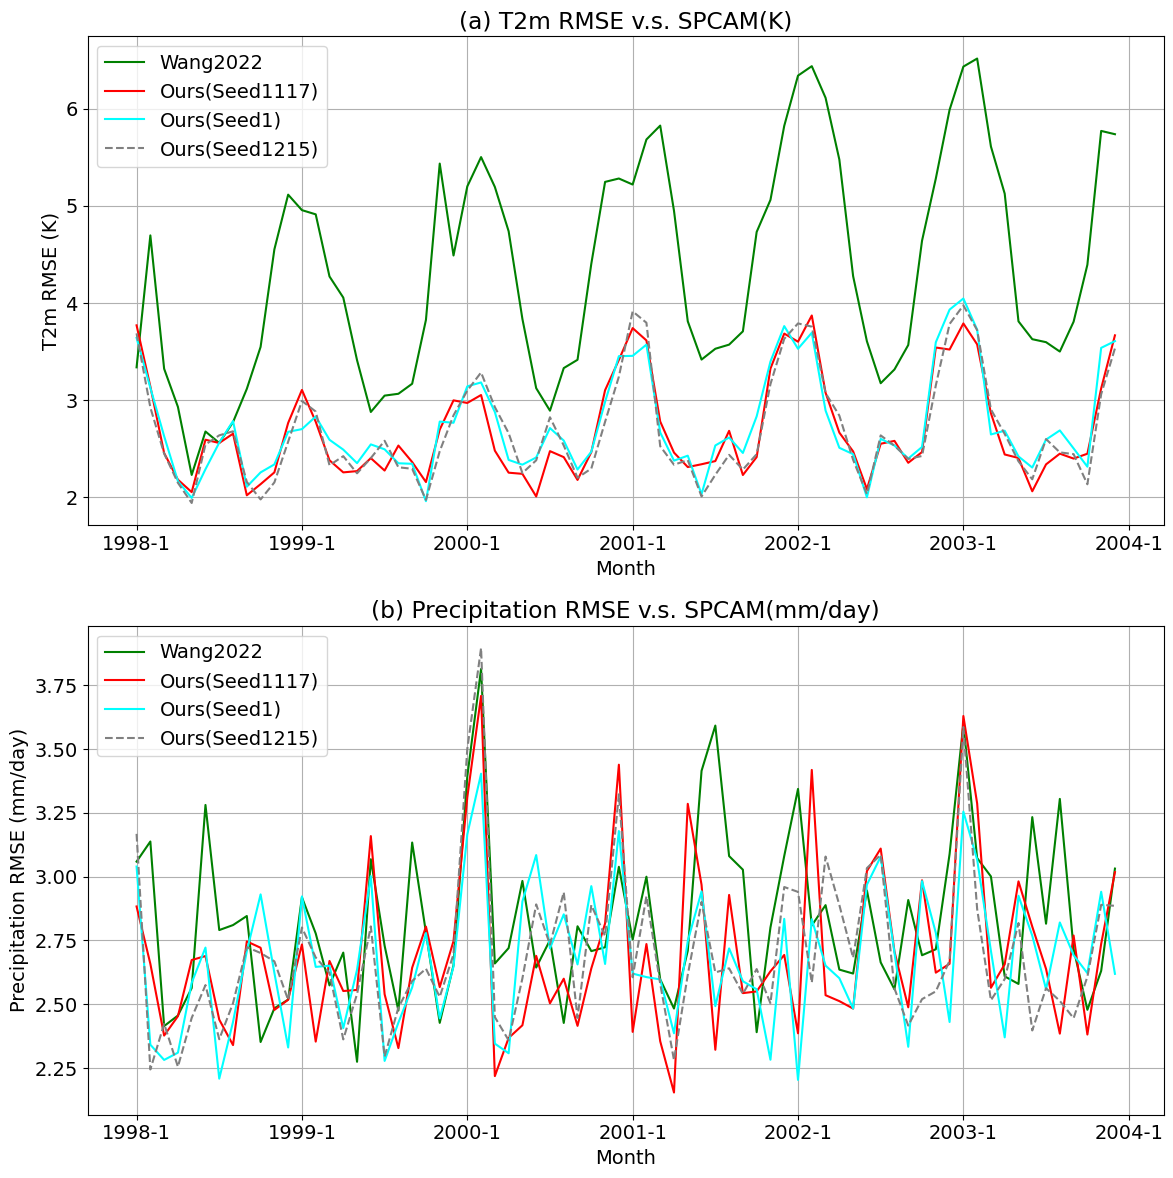

In [26]:
num_months = 72
colors = ["green", "orange", "purple"]

# Create figure with 2 vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))
casenames = ["CAM5", "Wang2022", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]

# First subplot - T2m RMSE
t_mrmse = np.load("/Users/jianda/Projects/PaperWriting/replaybuffer/plot_data/monthly_rmse_weighted/TREFHT_monthly_rmse.npy")
ax1.set_title("(a) T2m RMSE v.s. SPCAM(K)")
ax1.set_xlabel("Month")
ax1.grid(True)
plt.rcParams.update({'font.size': 14})
ax1.plot(t_mrmse[1, :num_months], label=casenames[1], color="green")
ax1.plot(t_mrmse[2, :num_months], label=casenames[2], color=our_colors[1117])
ax1.plot(t_mrmse[3, :num_months], label=casenames[3], color=our_colors[1])
ax1.plot(t_mrmse[4, :num_months], label=casenames[4], color=our_colors[1215], linestyle="--")
ax1.set_ylabel("T2m RMSE (K)")
ax1.set_xticks(np.arange(0, 84, 12))
ax1.set_xticklabels([f"{1998 + i//12}-{1 + i%12}" for i in range(0, 84, 12)])
ax1.legend(loc="upper left")

# Second subplot - Precipitation RMSE
t_mrmse = np.load("/Users/jianda/Projects/PaperWriting/replaybuffer/plot_data/monthly_rmse_weighted/PRECC_monthly_rmse.npy")
ax2.set_title("(b) Precipitation RMSE v.s. SPCAM(mm/day)")
ax2.set_xlabel("Month")
ax2.grid(True)
ax2.plot(t_mrmse[1, :num_months], label=casenames[1], color="green")
ax2.plot(t_mrmse[2, :num_months], label=casenames[2], color=our_colors[1117])
ax2.plot(t_mrmse[3, :num_months], label=casenames[3], color=our_colors[1])
ax2.plot(t_mrmse[4, :num_months], label=casenames[4], color=our_colors[1215], linestyle="--")
ax2.set_ylabel("Precipitation RMSE (mm/day)")
ax2.set_xticks(np.arange(0, 84, 12))
ax2.set_xticklabels([f"{1998 + i//12}-{1 + i%12}" for i in range(0, 84, 12)])
ax2.legend(loc="upper left")

plt.tight_layout()

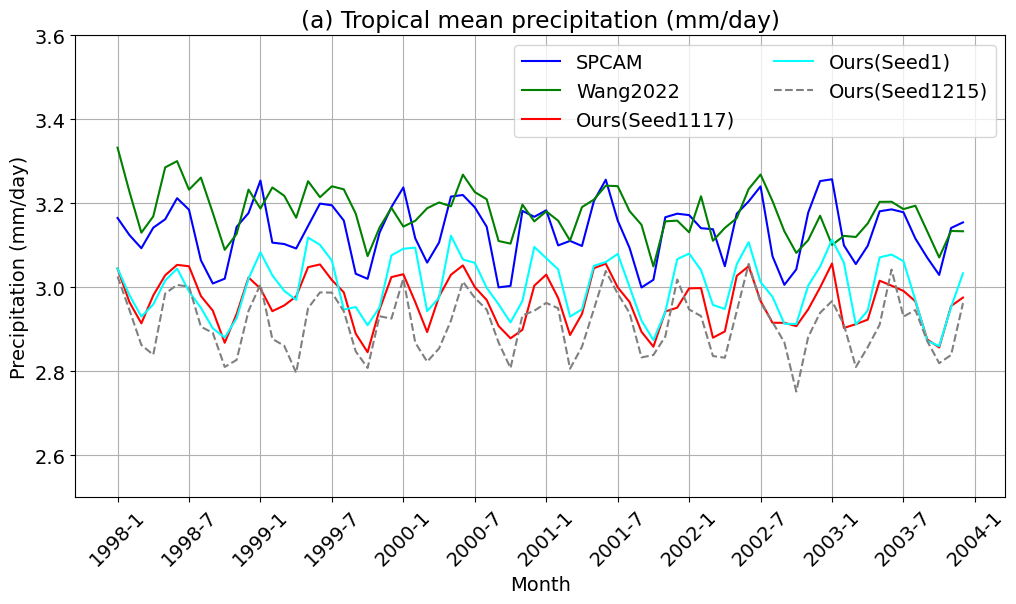

In [31]:
t_mrmse = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/monthly_mean_weighted/PRECC_monthly_mean.npy")
fig,ax = plt.subplots(figsize=(12,6))
casenames = ["TRMM", "SPCAM", "CAM5", "Wang2022", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]
plt.title("(a) Tropical mean precipitation (mm/day)")
plt.xlabel("Month")
plt.grid(True)
plt.ylim(2.5, 3.6)
colors = ["orange", "blue", "purple", "green"]
# for i in range(7):
    #ax.plot(t_mrmse[i, :], label=casenames[i], color=colors[i])
    # ax.plot(t_mrmse[i, :], label=casenames[i])
plt.rcParams.update({'font.size': 14})
# ax.plot(t_mrmse[0, :], label=casenames[0], color=colors[0])
ax.plot(t_mrmse[1, :], label=casenames[1], color=colors[1])
# ax.plot(t_mrmse[2, :], label=casenames[2], color=colors[2])
ax.plot(t_mrmse[3, :], label=casenames[3], color=colors[3])
ax.plot(t_mrmse[4, :], label=casenames[4], color=our_colors[1117])
ax.plot(t_mrmse[5, :], label=casenames[5], color=our_colors[1])
ax.plot(t_mrmse[6, :], label=casenames[6], color=our_colors[1215], linestyle="--")
plt.xticks(np.arange(0, 78, 6), [f"{1998 + i//12}-{1 + i%12}" for i in range(0, 78, 6)], rotation=45)
ax.set_ylabel("Precipitation (mm/day)")
plt.legend(ncol=2, loc='upper right')

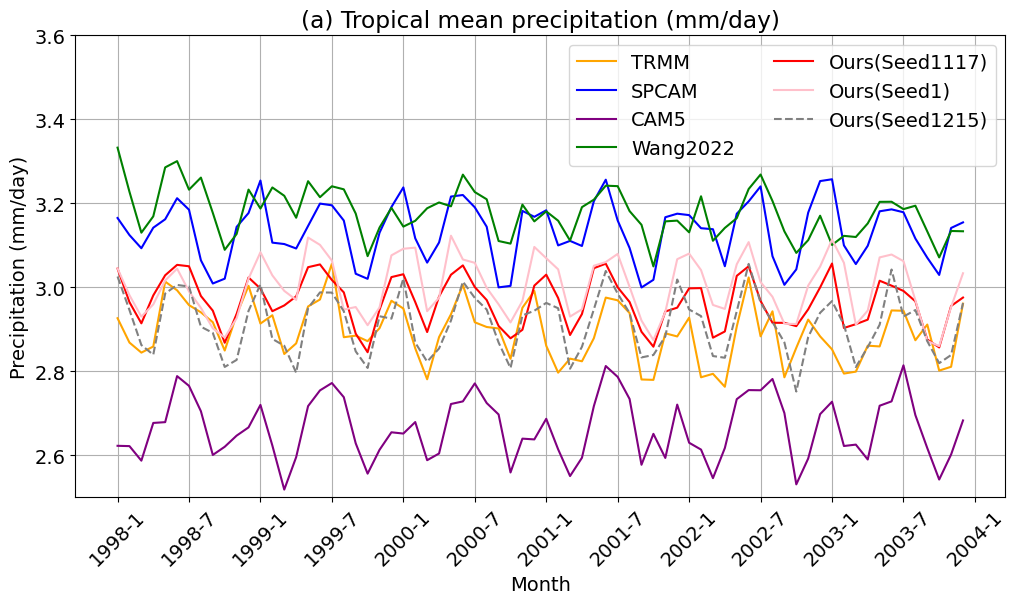

In [ ]:
t_mrmse = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/monthly_mean_weighted/PRECC_monthly_mean.npy")
fig,ax = plt.subplots(figsize=(12,6))
casenames = ["TRMM", "SPCAM", "CAM5", "Wang2022", "Ours(Seed1117)", "Ours(Seed1)", "Ours(Seed1215)"]
plt.title("(a) Tropical mean precipitation (mm/day)")
plt.xlabel("Month")
plt.grid(True)
plt.ylim(2.5, 3.6)
colors = ["orange", "blue", "purple", "green"]
# for i in range(7):
    #ax.plot(t_mrmse[i, :], label=casenames[i], color=colors[i])
    # ax.plot(t_mrmse[i, :], label=casenames[i])
plt.rcParams.update({'font.size': 14})
ax.plot(t_mrmse[0, :], label=casenames[0], color=colors[0])
ax.plot(t_mrmse[1, :], label=casenames[1], color=colors[1])
ax.plot(t_mrmse[2, :], label=casenames[2], color=colors[2])
ax.plot(t_mrmse[3, :], label=casenames[3], color=colors[3])
ax.plot(t_mrmse[4, :], label=casenames[4], color=our_colors[1117])
ax.plot(t_mrmse[5, :], label=casenames[5], color=our_colors[1])
ax.plot(t_mrmse[6, :], label=casenames[6], color=our_colors[1215], linestyle="--")
plt.xticks(np.arange(0, 78, 6), [f"{1998 + i//12}-{1 + i%12}" for i in range(0, 78, 6)], rotation=45)
ax.set_ylabel("Precipitation (mm/day)")
plt.legend(ncol=2, loc='upper right')